<b>Data mining Project - 2021/22</b><br/>
<span>
<b>Authors:</b> Mariagiovanna Rotundo (560765), Nunzio Lopardo (600005)</a> and Renato Eschini (203021)<br/>
<b>Group:</b>3<br/>
<b>Release date:</b> 26/12/2021
</span>

# Data understanding

In this notebook, we tried to understand what are the meaning of data and what are the domains of the attributes in the dataset. We also analyzed if there are errors of any kind seen in the theoretical part of the course.

**Importing libraries**

In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import collections
from scipy.stats.stats import pearsonr
import pandas as pd
import os
from datetime import date
import datetime

import seaborn as sns
import re

In [2]:
from ipynb.fs.full.functions_understanding import *

**Loading the datasets**

In [3]:
# load of the data
DATASET_DIR = '..' + os.path.sep + "dataset" + os.path.sep
df_tennis = pd.read_csv(DATASET_DIR + 'tennis_matches.csv', sep=',', index_col=0) 

#index_col=False say to not use the first column as ID
df_male = pd.read_csv(DATASET_DIR + 'male_players.csv', sep=',', index_col=False)
df_female = pd.read_csv(DATASET_DIR + 'female_players.csv', sep=',', index_col=False) 

**Print some records of the datasets**

A first print to look to the structure and data of the three datasets

In [4]:
df_tennis.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
0,2019-M020,Brisbane,Hard,32.0,A,20181231.0,300.0,105453.0,NaN,Kei Nishikori,...,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,3928.0,742618.69
1,2019-M020,Brisbane,Hard,32.0,A,20181231.0,299.0,106421.0,NaN,Daniil Medvedev,...,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,3928.0,742618.69
2,2019-M020,Brisbane,Hard,32.0,A,20181231.0,298.0,105453.0,NaN,Kei Nishikori,...,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,3928.0,742618.69
3,2019-M020,Brisbane,Hard,32.0,A,20181231.0,297.0,104542.0,PR,Jo-Wilfried Tsonga,...,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,3928.0,742618.69
4,2019-M020,Brisbane,Hard,32.0,A,20181231.0,296.0,106421.0,NaN,Daniil Medvedev,...,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,3928.0,742618.69


In [5]:
df_male.head()

,name,surname
0,Gardnar,Mulloy
1,Pancho,Segura
2,Frank,Sedgman
3,Giuseppe,Merlo
4,Richard Pancho,Gonzales


In [6]:
df_female.head()

,name,surname
0,Bobby,Riggs
1,X,X
2,Martina,Hingis
3,Mirjana,Lucic
4,Justine,Henin


**Table obtained from the following analysis about columns of tennis dataset**

A table that summarize the type of attribute in the tennis dataset. For each winner attribute there is the loser counterpart that is not in not reported in the table

|  Categorical  |   Ordinal   |      Numerical     | Ratio-Scaled |
|:-------------:|:-----------:|:------------------:|:------------:|
|   tourney_id  |  match_num  |      draw_size     |   winner_ht  |
|  tourney_name | winner_rank |       minutes      |  winner_age  |
|    surface    |             |     winner_ace     |              |
| tourney_level |             |      winner_df     |              |
|   winner_id   |             |     winner_svpt    |              |
|   winner_ioc  |             |    winner_1stln    |              |
|  winner_hand  |             |    winner_1stwon   |              |
|  winner_entry |             |    winner_2stwon   |              |
|    best_of    |             |       w_svgms      |              |
|               |             | winner_rank_points |              |
|               |             |      w_bdsaved     |              |
|               |             |      w_bdfaced     |              |

## 1. Missing values: Null

A first check on the datsets is about the analysis of the missing values (not marked with default values such us "unknown" or similar). This check is done for all the three datsets and it is analyzed attribute by attribute also looking at quantity of missing values 

**male dataset**

In [7]:
#info about data that we have for male
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55208 entries, 0 to 55207
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     55031 non-null  object
 1   surname  55165 non-null  object
dtypes: object(2)
memory usage: 862.8+ KB


In [8]:
#number of null in the columns
df_male.isnull().sum(axis = 0)

name       177
surname     43
dtype: int64

<AxesSubplot:ylabel='number of nulls'>

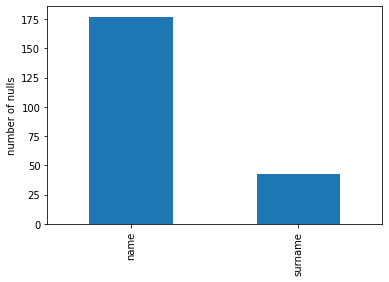

In [9]:
df_male.isnull().sum(axis = 0).plot(kind='bar', ylabel="number of nulls")

The male dataframe is composed by 2 columns: name and surname. It has 55208 entries and in the name column there are 177 nulls, while in surname there are 43 nulls.

**female dataset**

In [10]:
#info about data that we have for female
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46172 entries, 0 to 46171
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     44505 non-null  object
 1   surname  46172 non-null  object
dtypes: object(2)
memory usage: 721.6+ KB


In [11]:
#number of null in the columns
df_female.isnull().sum(axis = 0)

name       1667
surname       0
dtype: int64

<AxesSubplot:ylabel='number of nulls'>

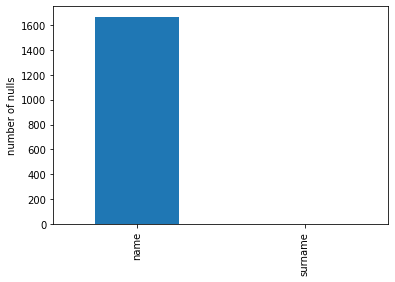

In [12]:
df_female.isnull().sum(axis = 0).plot(kind='bar', ylabel="number of nulls")

Also the female dataframe is composed by 2 columns: name and surname. It has 46172 entries and there are 1667 null values in the name, but in the surname column there are no null.

**tennis dataset**

In [13]:
df_tennis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

In [14]:
#we see if the attributes have some null values
df_tennis.isnull().any()

tourney_id            True
tourney_name          True
surface               True
draw_size             True
tourney_level         True
tourney_date          True
match_num             True
winner_id             True
winner_entry          True
winner_name           True
winner_hand           True
winner_ht             True
winner_ioc            True
winner_age            True
loser_id              True
loser_entry           True
loser_name            True
loser_hand            True
loser_ht              True
loser_ioc             True
loser_age             True
score                 True
best_of               True
round                 True
minutes               True
w_ace                 True
w_df                  True
w_svpt                True
w_1stIn               True
w_1stWon              True
w_2ndWon              True
w_SvGms               True
w_bpSaved             True
w_bpFaced             True
l_ace                 True
l_df                  True
l_svpt                True
l

In [15]:
#since all the attributes has missing values, we count them
df_tennis.isnull().sum(axis = 0)

tourney_id                55
tourney_name              25
surface                  188
draw_size                 29
tourney_level             29
tourney_date              28
match_num                 27
winner_id                 55
winner_entry          160301
winner_name               27
winner_hand               46
winner_ht             136787
winner_ioc                29
winner_age              2853
loser_id                  28
loser_entry           141974
loser_name                31
loser_hand                98
loser_ht              147780
loser_ioc                 26
loser_age               6538
score                    199
best_of                   29
round                     30
minutes               104468
w_ace                 103818
w_df                  103816
w_svpt                103818
w_1stIn               103818
w_1stWon              103816
w_2ndWon              103819
w_SvGms               103817
w_bpSaved             103813
w_bpFaced             103816
l_ace         

Tennis dataframe is composed by 49 columns and 186128 rows.
Here, some attributes have very few null values (such as 26 or 27), but other attributes has more than 50% of null values (such us 103818 or 160301 null values on 186128)

<AxesSubplot:>

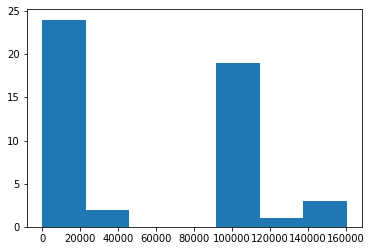

In [16]:
df_tennis.isnull().sum(axis = 0).hist(bins="sturges", grid=False)

## 2. Duplicate data

A second check that was done is about duplicate data: a first check is about duplicate rows. Also a check to see if the same person (same name and surname) is in both male and female dataframes is done. 

**male and female dataset**

In [17]:
#we see if there are duplicates in the dataset male and female
df_male.duplicated(keep='first').sum()

524

In [18]:
df_female.duplicated(keep='first').sum()

511

Both the datasets of male and female has rows with same name and surname. These rows can be duplicates (so they correspond to the same person) or they can be homonyms. In this latter case we cannot distinguish the matches of one player by the ones of the other player. In the next steps, looking data of tennis datafrane, we will consider them as the same duplicates and not homonyms.

In [19]:
#we remove (only) the duplicated rows
df_male_no_dup = df_male.drop_duplicates()
df_female_no_dup = df_female.drop_duplicates()

**Looking for people in both the datsets**

In [20]:
#see if a name can be both male and female and manage them
df_players = pd.concat([df_male_no_dup, df_female_no_dup])
df_players[df_players.duplicated(keep='first')==True]

,name,surname
0,Bobby,Riggs
417,Robin,White
2687,Di,Zhao
3660,J,Tobin
3918,Yi,Liu
...,...,...
44222,NaN,Beckert
45538,J,Lambert
45597,J,Young
45658,M,Noble


In [21]:
df_players.duplicated(keep='first').sum()

74

There are 74 rows for both players male and female.

In [22]:
df_players[df_players.duplicated(subset=['name', 'surname'], keep='first')==True]

,name,surname
0,Bobby,Riggs
417,Robin,White
2687,Di,Zhao
3660,J,Tobin
3918,Yi,Liu
...,...,...
44222,NaN,Beckert
45538,J,Lambert
45597,J,Young
45658,M,Noble


**tennis dataset**

In [23]:
#check if there are duplicated rows in the dataset
df_tennis.duplicated(keep='first').sum()

309

In the tennis dataframe there are 309 duplicate rows.

So, in all the three dataframes there are duplicates

## 3. Errors in male and female

Names and surnames are analyzed to find characters that can't be in there (such as "?" or numbers) and missing values (also ones characterized by default values are search for).<br>
Are considered as valid characters only letters and the simbols "'", ".", "-" for names like "O'Connors", "Jr." or similar with same pattern.<br>
It is done a check to see if pandas library correctly splits values in the colums instead of read values of 2 columns as a single value of only one column

**male dataset**

In [24]:
#see if all the names and surnames are valid
df_male[df_male['surname'].str.count("[a-zA-Z '.-]")!=df_male['surname'].str.len()]

,name,surname
385,Jose,Garcia G003
457,Pedro,Gonzalez G162
858,Robert,Casey C100
1134,Robert,Phillips P239
1301,Ola,Jonsson J092
...,...,...
44808,Jorman,Reyes Rc60
45850,NaN,Bye1
46253,Fernando,Cabrera (Chi)
49618,Juan,Martin (Bra)


In [25]:
df_male[df_male['name'].str.count("[a-zA-Z ',.-]")!=df_male['name'].str.len()]

,name,surname
10429,NaN,NaN
16955,??,Baillie
17067,NaN,Rf Le Sueur
17091,NaN,A Riches
17093,NaN,N Zaher
...,...,...
49714,NaN,Mezquita
49715,NaN,Vicens
49722,NaN,Segun
51999,NaN,I Georgiadis


In [26]:
df_check_name = df_male[~df_male['name'].isna()]
df_check_name[df_check_name['name'].str.contains(',')]

,name,surname
40071,"Jason ""Jj"",Belan",NaN


In [27]:
df_check_surname = df_male[~df_male['surname'].isna()]
df_check_surname[df_check_surname['surname'].str.contains(',')]

,name,surname


In [28]:
#unknown names
print("Unknown name: ", df_male[df_male['name'].str.lower()=='unknown'].shape[0])
#unknown surnames
print("Unknown surname: ", df_male[df_male['surname'].str.lower()=='unknown'].shape[0])

Unknown name:  50
Unknown surname:  6


In the male dataset, in the surname column there are 99 invalid values, while in the name there are 179 (also nulls are counted). Furtermore, there are 50 missing values specified by the "unknown" values in the name column and 6 in the surname columns. There is also a row split in a wrong way by pandas library where name and surname are all in name columns and surname is Nan (the row 40071)

**female**

In [29]:
df_female[df_female['surname'].str.count("[a-zA-Z '.-]")!=df_female['surname'].str.len()]

,name,surname
21238,Ekaterina,Makarova 1996
31618,Habiba,El_Anany


In [30]:
df_female[df_female['name'].str.count("[a-zA-Z ',.-]")!=df_female['name'].str.len()]

,name,surname
3763,NaN,Marine
16643,NaN,Brown
16699,NaN,Mckinney
16701,NaN,Munsell
16746,NaN,Raimo
...,...,...
45989,NaN,Valtier
46027,NaN,Keppel
46072,NaN,Bavinger
46076,NaN,Weeks


In [31]:
df_check_name = df_female[~df_female['name'].isna()]
df_check_name[df_check_name['name'].str.contains(',')]

,name,surname


In [32]:
df_check_surname = df_female[~df_female['surname'].isna()]
df_check_surname[df_check_surname['surname'].str.contains(',')]

,name,surname


In [33]:
#unknown names
print("Unknown name: ", df_female[df_female['name'].str.lower()=='unknown'].shape[0])
#unknown surnames
print("Unknown surname: ", df_female[df_female['surname'].str.lower()=='unknown'].shape[0])

Unknown name:  0
Unknown surname:  0


In the female dataset, in the surname column there are 2 invalid values, while in the name there are 1667 (also nulls are counted). There are no missing values specified by the "unknown" values and no rows split in a wrong way by pandas.

## 4. Analysis of tennis dataset

**print of name of columns of tennis dataset**

In [34]:
df_tennis.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_entry', 'winner_name',
       'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'tourney_spectators', 'tourney_revenue'],
      dtype='object')

**print of types of the columns**

In [35]:
df_tennis.dtypes.value_counts()

float64    35
object     14
dtype: int64

In [36]:
#Values in the columns with type object
for column in df_tennis.select_dtypes(include=['object']).columns:
    print("Distinct Values in "+str(column)+": \n", df_tennis[column].unique(), "\n")

Distinct Values in tourney_id: 
 ['2019-M020' '2019-0451' '2019-0891' ... '2020-W-ITF-USA-47A-2020'
 '2020-W-ITF-USA-48A-2020' nan] 

Distinct Values in tourney_name: 
 ['Brisbane' 'Doha' 'Pune' ... 'W100 Nicholasville KY' 'W25 Las Vegas NV'
 nan] 

Distinct Values in surface: 
 ['Hard' 'Clay' 'Grass' 'Carpet' nan] 

Distinct Values in tourney_level: 
 ['A' 'P' 'G' 'I' 'M' 'PM' 'F' 'D' 'C' '15' '25' '60' '100' '80' '10' '50'
 '75' 'O' 'W' nan] 

Distinct Values in winner_entry: 
 [nan 'PR' 'Q' 'WC' 'Alt' 'LL' 'SE' 'ALT' 'SR' 'JE' 'A' 'ITF' 'P' 'I' 'IR'
 'JR'] 

Distinct Values in winner_name: 
 ['Kei Nishikori' 'Daniil Medvedev' 'Jo-Wilfried Tsonga' ... 'Sultan Gonen'
 'Viktoria Veleva' nan] 

Distinct Values in winner_hand: 
 ['R' 'L' 'U' nan] 

Distinct Values in winner_ioc: 
 ['JPN' 'RUS' 'FRA' 'AUS' 'CAN' 'BUL' 'GBR' 'SRB' 'USA' 'LAT' 'CZE' 'EST'
 'UKR' 'NED' 'CRO' 'BLR' 'CHI' 'SUI' 'POL' 'GER' 'LUX' 'ESP' 'ITA' 'GEO'
 'HUN' 'LTU' 'ARG' 'CYP' 'BIH' 'RSA' 'BEL' 'TUN' 'IND' 'BRA' 'AU

#### tourney_id

For this attribute it is checked that the first 4 characters is a valid year (a year not in the future and not before the 1874, year in which tennis was invented) for the tourney as specified in the documentation. It is also checked that a tourney id is associated to more matches and it is counted the number of different toruney ids.

In [37]:
#check that for non null values, the first 4 char are the year
#count rows whose firts 4 char are not numbers
df_tennis[df_tennis['tourney_id'].str[:4].str.isnumeric()==False].shape[0] 

0

In [38]:
#chech if some years are in the future (so are invalid)(ignore nulls)
df_tennis[pd.to_numeric(df_tennis['tourney_id'].str[:4]).fillna(0).astype('int') > date.today().year].shape[0] 

0

In [39]:
#chech if there are invalid years because to much in the past (ignore nulls)
df_tennis[pd.to_numeric(df_tennis['tourney_id'].str[:4]).fillna(date.today().year).astype('int') < 1874 ].shape[0] 

0

The first 4 numbers in the tourney_id are always valid when the tourney_id id not null

In [40]:
#chech that for each tourney there is more than one match (every id appears more than once)
df_tennis[df_tennis['tourney_id'].duplicated(keep=False)==False].shape[0] 

0

Every torney_id appears more than once

In [41]:
#check how many distinct tourney are present
df_tennis["tourney_id"].value_counts().count()

4853

There are 4853 distinc tourney in the dataset

#### tourney_name

In [42]:
#chech that for the same tourney_id we have always the same name
len(df_tennis.groupby(['tourney_id','tourney_name']).size())-len(df_tennis.groupby(['tourney_id']).size())
#df_tennis[df_tennis['tourney_id']=='2019-M021'] #this is an example of toruney id with more names

30

In [43]:
len(df_tennis.groupby(['tourney_name','tourney_id']).size())-len(df_tennis.groupby(['tourney_name']).size())

2395

For a certain tourney_id we may have more tourney_names, so we should manage these names for example to remove errors from some rows. For a tourney_name we can have more tourney_ids.

In [44]:
df_tennis["tourney_name"].value_counts().count() #do not consider also the nan

2488

In [45]:
dict_tourney_id = df_tennis.groupby('tourney_id')['tourney_name'].unique().apply(list).to_dict()
for key, value in dict_tourney_id.items():
    if len(value)>1:
        print(key, value)

2016-M006 ['Indian Wells', 'Indian Wells Masters']
2016-M007 ['Miami', 'Miami Masters']
2016-M009 ['Rome', 'Rome Masters']
2016-M010 ["'s Hertogenbosch", 's Hertogenbosch']
2016-M021 ['Madrid', 'Madrid Masters']
2016-M024 ['Cincinnati', 'Cincinnati Masters']
2016-O16 ['Olympics', 'Rio Olympics']
2017-M006 ['Indian Wells', 'Indian Wells Masters']
2017-M007 ['Miami', 'Miami Masters']
2017-M009 ['Rome', 'Rome Masters']
2017-M010 ["'s Hertogenbosch", 's Hertogenbosch']
2017-M015 ['Beijing ', 'Beijing']
2017-M021 ['Madrid', 'Madrid Masters']
2017-M024 ['Cincinnati', 'Cincinnati Masters']
2018-M006 ['Indian Wells Masters', 'Indian Wells']
2018-M007 ['Miami Masters', 'Miami']
2018-M009 ['Rome Masters', 'Rome']
2018-M010 ['s Hertogenbosch', 's-Hertogenbosch']
2018-M021 ['Madrid Masters', 'Madrid']
2018-M024 ['Cincinnati Masters', 'Cincinnati']
2019-560 ['US Open', 'Us Open']
2019-M006 ['Indian Wells Masters', 'Indian Wells']
2019-M007 ['Miami Masters', 'Miami']
2019-M009 ['Rome Masters', 'Rome

It is possible to notice that the names associated to the same tourney id are very similar. For example: 'US Open' and 'Us Open' or 'Rome Masters' and 'Rome'

**surface**

In [46]:
df_tennis.groupby('surface')['tourney_id'].nunique()

surface
Carpet      88
Clay      2042
Grass      103
Hard      2558
Name: tourney_id, dtype: int64

The domains is composed by 4 different values and some of them appear more frequently than others.

#### tourney_level

Levels for male tourney and female tourney are specified and analyzed. It is analyzed also the domain to see if there are some more codes than the ones in the documentation

In [47]:
#codes from documentation
levels_man = ['G', 'M', 'A', 'C', 'S', 'F', 'D']
levels_woman = levels_man + ['P', 'PM', 'I', 'T1']
levels_woman_man = ['E','J','T']
all_levels = levels_man + levels_woman + levels_woman_man

In [48]:
codes = df_tennis[(~df_tennis['tourney_level'].isin(all_levels)) & (~df_tennis['tourney_level'].isna())]['tourney_level'].unique()
codes

array(['15', '25', '60', '100', '80', '10', '50', '75', 'O', 'W'],
      dtype=object)

There are 2 more codes respect the one expressely indicated by the documentation: 'O', that is the code for Olympic Games (male and female) and 'W', that is a code associated to women's tourneys. The numeric codes are associated to both male and female tourneys.

In [49]:
#list updated with new values
levels_woman = levels_woman + ['W']
male_female_codes = codes.tolist()
male_female_codes.remove('W')
levels_woman_man = levels_woman_man + male_female_codes
all_levels = levels_man + levels_woman + levels_woman_man

In [50]:
#check what are other codes that can appear (for women)
df_other_levels = df_tennis[~df_tennis['tourney_level'].isin(all_levels)]
#get codes about the prize money
df_other_levels[df_other_levels['tourney_level'].str.isnumeric()==True]['tourney_level'].unique()

array([], dtype=object)

In [51]:
#get the other codes not cited in the document and that are not prize
df_other_levels[df_other_levels['tourney_level'].str.isnumeric()==False]['tourney_level'].unique()

array([], dtype=object)

In [52]:
#check if there are at least one row for each cited code
list(set(all_levels) - set(df_tennis['tourney_level'].unique()))

['T', 'J', 'T1', 'E', 'S']

For these codes there are no rows in the dataset

In [53]:
#get the occurrenes of each level
df_tennis["tourney_level"].value_counts()

15     45807
C      40865
25     30743
A      11678
10     11372
G       9981
I       8452
60      6517
P       5944
M       3877
100     2685
D       2373
80      1909
50      1488
PM      1478
W        436
F        211
75       155
O        128
Name: tourney_level, dtype: int64

Check between sex of the player and code of the tourney where xe plays

In [54]:
# check sex by names
df_male['combined'] = df_male['name'].astype(str) + ' ' + df_male['surname'].astype(str)
df_female['combined'] = df_female['name'].astype(str) + ' ' + df_female['surname'].astype(str)

# we transform into dictionaries to optimize search performance, putting name and surname as keys
dict_male = df_male['combined'].to_dict();
dict_male_rev = {value:key for key, value in dict_male.items()}

dict_female = df_female['combined'].to_dict();
dict_female_rev = {value:key for key, value in dict_female.items()}

df_tennis_level_tmp = df_tennis.copy() # avoid overwrite original dataset
# apply CheckSex as lambda function to all rows, add new columns with sex
df_tennis_level_tmp['w_sex'] = df_tennis_level_tmp['winner_name'].apply(lambda x: CheckSex(x, dict_male_rev, dict_female_rev))
df_tennis_level_tmp['l_sex'] = df_tennis_level_tmp['loser_name'].apply(lambda x: CheckSex(x, dict_male_rev, dict_female_rev))

no_error = True
for row in df_tennis_level_tmp.itertuples():
    level = row.tourney_level
    # if there is a nan in level, skip to next...
    if str(level)=='nan':
        continue
    w_sex = row.w_sex
    l_sex = row.l_sex 
    # check sex...
    if w_sex == 'm' or l_sex == 'm':
        # search for the level in the respective set for man and woman/man
        if level not in levels_man and level not in levels_woman_man:  
            no_error = False
            print('level error: w_sex:' + w_sex + ' - l_sex:' + l_sex + ' - tourney_id:' + str(row.tourney_id) + ' - ' + str(wn) + ' vs ' + str(ln) + ' - level:' + str(level))
    elif w_sex == 'f' or l_sex == 'f':
        # search for the level in the respective set for man and woman/man
        if level not in levels_woman and level not in  levels_woman_man:
            no_error = False
            print('level error: w_sex:' + w_sex + ' - l_sex:' + l_sex + ' - tourney_id:' + str(row.tourney_id) + ' - ' + str(wn) + ' vs ' + str(ln) + ' - level:' + str(level))
            
if no_error:
    print("All levels are correct")

All levels are correct


array(['A', 'P', 'G', 'I', 'M', 'PM', 'F', 'D', 'C', '15', '25', '60',
       '100', '80', '10', '50', '75', 'O', 'W', nan], dtype=object)

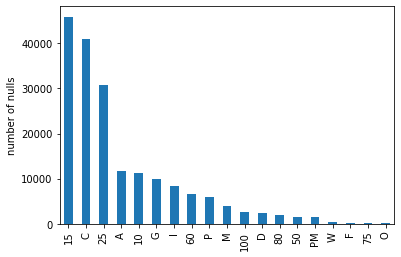

In [55]:
df_tennis["tourney_level"].value_counts().plot(kind='bar', ylabel="number of nulls")
df_tennis["tourney_level"].unique()

Graphic to show that occurrences of values in the tourney level are unbalanced

#### winner_name and loser_name

Check if there are invalid characters in the names of winner and loser as done for male and female dataset, using also an external source to compare names

In [56]:
#check that names are valid
df_tennis[df_tennis['winner_name'].str.count("[a-zA-Z ',.-]")!=df_tennis['winner_name'].str.len()]['winner_name']

70116     Alejandro Gomez Gb42
74122     Alejandro Gomez Gb42
74136     Alejandro Gomez Gb42
74160     Alejandro Gomez Gb42
74169     Alejandro Gomez Gb42
                  ...         
186117                     NaN
186118                     NaN
186120                     NaN
186121                     NaN
186123                     NaN
Name: winner_name, Length: 105, dtype: object

In [57]:
df_tennis[df_tennis['loser_name'].str.count("[a-zA-Z ',.-]")!=df_tennis['loser_name'].str.len()]['loser_name']

69886     Alejandro Gomez Gb42
70124     Alejandro Gomez Gb42
70862       Michael Grant Gd13
74143     Alejandro Gomez Gb42
74174     Alejandro Gomez Gb42
                  ...         
186119                     NaN
186123                     NaN
186125                     NaN
186126                     NaN
186127                     NaN
Name: loser_name, Length: 108, dtype: object

Execute the next three lines to execute the checks on male and female names.

In [58]:
df_names = pd.read_csv(DATASET_DIR + 'names.csv', sep=',', index_col=False)
df_names.head()

,Birth_Year,Gender,Ethnic_Group,Name,Count,Rank
0,2011-11-08,FEMALE,HISPANIC,GERALDINE,13,75
1,2011-11-08,FEMALE,HISPANIC,GIA,21,67
2,2011-11-08,FEMALE,HISPANIC,GIANNA,49,42
3,2011-11-08,FEMALE,HISPANIC,GISELLE,38,51
4,2011-11-08,FEMALE,HISPANIC,GRACE,36,53


In [59]:
male_names = df_names[df_names['Gender'] == 'MALE']['Name']
male_names = dict.fromkeys(male_names, None)

In [60]:
female_names = df_names[df_names['Gender'] == 'FEMALE']['Name']
female_names = dict.fromkeys(female_names, None)

*male name*

In [61]:
invalid_names = []
for name in df_male['name'].dropna().tolist():
    if (name in female_names):
        invalid_names.append(name)
print(dict.fromkeys(invalid_names, None).keys())

dict_keys(['Ashley', 'Milan', 'Charlie', 'Angel', 'Kelly', 'Simone', 'Jamie', 'Alexis', 'Andrea', 'Michal', 'Sasha', 'Blake', 'Leslie', 'Toby', 'Jocelyn', 'Jordan', 'Taylor', 'Morgan', 'Paris', 'Valery', 'Dylan', 'Ariel', 'Logan', 'Kelsey', 'Amani', 'Lindsay', 'Naomi', 'Ruby', 'Farah', 'Perry', 'Sydney', 'Sunny', 'Mackenzie', 'Karen', 'Aubrey', 'Sima', 'Hope', 'Peyton', 'Shirley', 'Avery', 'Jessie', 'Vivian', 'Eden', 'Destiny', 'Emerson', 'Rosa', 'Parker', 'Chana', 'Joy', 'Mina', 'Aria', 'Reese', 'Ada', 'Olive', 'Addison', 'Arya', 'Rowan', 'Skyler', 'Winter', 'Quinn', 'Alisson', 'Maria', 'Vicky', 'Frances', 'Aiza', 'Stacy', 'Valerie', 'Suri', 'Kennedy', 'Riley', 'Lilian', 'Payton', 'Sage', 'Danielle', 'Gabriela'])


*female names*

In [62]:
invalid_names = []
for name in df_female['name'].dropna().tolist():
    if (name in male_names):
        invalid_names.append(name)
print(dict.fromkeys(invalid_names, None).keys())

dict_keys(['Chris', 'Shawn', 'Jean', 'Alex', 'Eden', 'Alexis', 'Ali', 'Riley', 'Taylor', 'Angel', 'Christian', 'Noel', 'Kyle', 'Zane', 'Nikita', 'Austin', 'Connor', 'Cameron', 'Daniel', 'Luca', 'Spencer', 'Ariel', 'Quinn', 'Theo', 'Sean', 'Alpha', 'Ayan', 'Tyler', 'Devin', 'Carson', 'Jayden', 'Gabriel', 'Rowan', 'Jesse', 'Jordan', 'Ryan', 'Andre', 'Danny', 'Ari', 'Peyton', 'Lian', 'Drew', 'Dylan', 'Elan', 'Skyler', 'Milan', 'Adrian', 'Owen', 'August', 'Randy', 'Andy', 'Francis', 'Jerry', 'Dean', 'Lenny', 'Carter', 'Johan', 'Tony', 'Travis', 'Liam', 'Jay', 'Peter', 'George', 'Marcel'])


There are invalid characters in the names of some winners and some losers

#### winner_id and loser_id

Check if the same id is associated to only one player and that a player has only one id

In [63]:
df_tennis['winner_id'].value_counts()

104925.0    289
100644.0    267
106421.0    267
104745.0    262
126774.0    254
           ... 
216391.0      1
136461.0      1
212285.0      1
220281.0      1
241729.0      1
Name: winner_id, Length: 6176, dtype: int64

In [64]:
df_tennis['loser_id'].value_counts()

105943.0    180
105063.0    174
106148.0    170
105166.0    169
106368.0    169
           ... 
223438.0      1
223062.0      1
216247.0      1
245082.0      1
221890.0      1
Name: loser_id, Length: 10031, dtype: int64

In [65]:
find_match_sameWL(df_tennis)

5


,tourney_id,match_num,winner_id,loser_id,winner_name,loser_name,winner_ioc,loser_ioc
72793,2016-7182,244.0,122059.0,122059.0,Steven De Waard,Steven De Waard,AUS,AUS
75235,2016-7553,261.0,105026.0,105026.0,Takuto Niki,Takuto Niki,JPN,JPN
75636,2016-7614,249.0,105781.0,105781.0,Andrei Vasilevski,Andrei Vasilevski,BLR,BLR
133100,2018-W-WITF-UKR-02A-2018,6.0,221371.0,221371.0,Lyubov Kostenko,Lyubov Kostenko,UKR,UKR
135577,2019-W-ITF-AUS-04A-2019,15.0,221862.0,221862.0,Sophia Fry,Sophia Fry,AUS,AUS


There are five records in which winner and loser are the same player so they have the same ids (and same information about the player). 

**Verifying the univocal association between a player and his ID.**

Check if there are palyers that share the same ID, this procedure must be performed for both winner and loser.

In [66]:
df_mul_names = df_tennis[df_tennis['winner_id'].isin(get_w_id_names(df_tennis))][['winner_name','winner_id']].sort_values(by=['winner_name','winner_id'])
df_mul_names = df_mul_names.value_counts().reset_index()
df_mul_names.columns = ['winner_name', 'id', 'count']
print(df_mul_names.sort_values(by='id'))
df_mul_names.shape[0]

               winner_name        id  count
18             Kai Lemstra  202349.0      1
24     Rushmi Chakravarthi  202349.0      1
8           Marvin Moeller  202359.0     14
9            Chin Wei Chan  202359.0     10
3        An Sophie Mestach  202420.0     52
13            Aidan Mchugh  202420.0      6
0      Alison Van Uytvanck  202421.0    142
17         George Houghton  202421.0      1
4            Julia Boserup  202426.0     48
20             Matt Halpin  202426.0      1
1        Aleksandra Krunic  202434.0    136
23           Ricardo Ortiz  202434.0      1
16          Jasmina Tinjic  202475.0      1
22          Philip Henning  202475.0      1
14        Yan Bondarevskiy  206091.0      4
10         Yolande Leacock  206091.0      8
15            Andrej Glvac  206137.0      3
7        Oleksandra Piskun  206137.0     18
6            Alice Bacquie  206171.0     23
19           Barnaby Smith  206171.0      1
5        Beatrice Lombardo  206173.0     25
2            Jannik Sinner  2061

26

Are present 26 athletes that share the same *winner_id*.

In [67]:
df_mul_names = df_tennis[df_tennis['loser_id'].isin(get_l_id_names(df_tennis))][['loser_name','loser_id']].sort_values(by=['loser_name','loser_id'])
df_mul_names = df_mul_names.value_counts().reset_index()
df_mul_names.columns = ['loser_name', 'id', 'count']
print(df_mul_names.sort_values(by='id'))
df_mul_names.shape[0]

                loser_name        id  count
89            Kushaan Nath  200033.0      1
21         Serena Williams  200033.0     34
35         Liga Dekmeijere  202273.0     10
61          Anurag Nenwani  202273.0      2
24          Mariana Correa  202277.0     28
..                     ...       ...    ...
28          Amira Benaissa  208603.0     14
86          Karlis Ozolins  209866.0      1
44             Grace Leake  209866.0      4
31  Zeynep  Sena Sarioglan  216569.0     12
32   Zeynep Sena Sarioglan  216569.0     12

[96 rows x 3 columns]


96

Are present 96 athletes that share the same *loser_id*.

Analyzing the two lists, it has been hypothesized that the lack of univocal association between players and ids may be due to errors such as incorrect transcription of IDs or errors in the writing of names.

---

Check if there are palyers that have more then one ID associated, also in this case the procedure must be performed for both winner and loser.

In [68]:
df_tennis[df_tennis['winner_name'].isin(get_w_name_ids(df_tennis))][['winner_name','winner_id','winner_ioc','winner_hand']].drop_duplicates().sort_values(by='winner_name')

,winner_name,winner_id,winner_ioc,winner_hand
167668,Astrid Cirotte,236980.0,FRA,U
172168,Astrid Cirotte,223401.0,FRA,U
124993,Fitriani Sabatini,221189.0,INA,U
173281,Fitriani Sabatini,239429.0,INA,U
69985,Kuan Yi Lee,134120.0,TPE,R
134878,Kuan Yi Lee,221745.0,TPE,R
141854,Liisa Varul,222914.0,EST,U
179935,Liisa Varul,222915.0,EST,U
182257,Maria Fernanda Navarro,223287.0,MEX,U
166903,Maria Fernanda Navarro,223367.0,MEX,U


In [69]:
df_tennis[df_tennis['loser_name'].isin(get_l_name_ids(df_tennis))][['loser_name','loser_id','loser_ioc','loser_hand']].drop_duplicates().sort_values(by='loser_name')

,loser_name,loser_id,loser_ioc,loser_hand
166474,Astrid Cirotte,223401.0,FRA,U
167682,Astrid Cirotte,236980.0,FRA,U
468,Ekaterina Makarova,201505.0,RUS,L
51441,Ekaterina Makarova,223126.0,RUS,U
145130,Eleni Fasoula,222943.0,KAZ,U
145085,Eleni Fasoula,222942.0,GRE,U
176942,Ellie Myers,240168.0,USA,U
160585,Ellie Myers,222407.0,USA,U
163270,Emilse Lujan Ruiz,236974.0,ARG,U
135229,Emilse Lujan Ruiz,222646.0,ARG,U


There are tennis players that presents more then one id associated, both for winners(9) and losers(19) and there are ids associated to more than one players.

In this case, we manually verified if these multiple associations are due to the presence of namesakes. We used the official ATP and WTA websites for the check.

#### winner_hand and loser_hand

Check if all players have only one between L and R and that values different from "U", "L", and "R" do not appear

In [70]:
#check that there are not indicated hand that are invalid (ignore nulls)
hand = ['R','L','U']
df_tennis[~df_tennis['winner_hand'].fillna('U').str.upper().isin(hand)].shape[0]

0

In [71]:
df_tennis[~df_tennis['loser_hand'].fillna('U').str.upper().isin(hand)].shape[0]

0

In [72]:
winner_hand_dict = df_tennis.groupby(['winner_id','winner_name'])['winner_hand'].unique().apply(list).to_dict()
loser_hand_dict = df_tennis.groupby(['loser_id','loser_name'])['loser_hand'].unique().apply(list).to_dict()

In [73]:
for key, value in winner_hand_dict.items():
    if key in loser_hand_dict.keys() and value[0] not in loser_hand_dict[key]:
        loser_hand_dict[key].append(value[0])

In [74]:
loser_hand_dict

{(100644.0, 'Alexander Zverev'): ['R'],
 (101305.0, 'Jeff Greenwald'): ['R'],
 (101339.0, 'Agustin Moreno'): ['R'],
 (102093.0, 'Martin Damm'): ['L'],
 (102706.0, 'Wei Yu Su'): ['R'],
 (102737.0, 'Gergely Kisgyorgy'): ['R'],
 (102800.0, 'Nenad Zimonjic'): ['R'],
 (102863.0, 'Takao Suzuki'): ['R'],
 (102864.0, 'Frank Moser'): ['R'],
 (102963.0, 'Robert Lindstedt'): ['R'],
 (102987.0, 'Andre Sa'): ['R'],
 (103060.0, 'Alejandro Hernandez'): ['R'],
 (103077.0, 'Konstantinos Economidis'): ['R'],
 (103105.0, 'Ruben Ramirez Hidalgo'): ['R'],
 (103163.0, 'Tommy Haas'): ['R'],
 (103175.0, 'Toshihide Matsui'): ['R'],
 (103285.0, 'Radek Stepanek'): ['R'],
 (103327.0, 'Alessandro Motti'): ['L'],
 (103333.0, 'Ivo Karlovic'): ['R'],
 (103401.0, 'Jan Hernych'): ['R'],
 (103417.0, 'Brian Battistone'): ['R'],
 (103499.0, 'Aqeel Khan'): ['R'],
 (103523.0, 'Rohan Bopanna'): ['R'],
 (103529.0, 'Aisam Ul Haq Qureshi'): ['R'],
 (103543.0, 'David Marrero'): ['R'],
 (103565.0, 'Stephane Robert'): ['R'],
 (103

In [75]:
for key, value in loser_hand_dict.items():
    if len(loser_hand_dict[key])>1 and ('U' not in loser_hand_dict[key] and np.nan not in loser_hand_dict[key]):
        print(key)
        print(loser_hand_dict[key])

There are not invalid entries for the hand of winner or loser. Furthermore thare are not different hands (both L and R) for the same player

<AxesSubplot:>

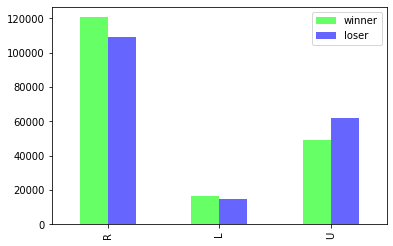

In [76]:
index = df_tennis[~df_tennis['winner_hand'].isna()]['winner_hand'].unique()
pd.DataFrame({'winner': df_tennis['winner_hand'].value_counts(), 'loser': df_tennis['loser_hand'].value_counts()}, index=index).plot.bar(color=["#66ff66","#6666ff"])

#### winner_ioc and loser_ioc, International Olympic Code validity check

An external source is used to check if all the IOC codes in the dataset are valid

In [77]:
df_countrycode = pd.read_csv(DATASET_DIR + 'country-codes_csv.csv', sep=',', index_col=False) 

##### Wrong codes winner_ioc

In [78]:
w_check_cc = pd.Series(~df_tennis.winner_ioc.isin(df_countrycode.IOC).values, df_tennis.winner_ioc.values)
w_check = w_check_cc[w_check_cc].index
w_check.value_counts()

MNE    198
TRI     21
PHL     18
UNK      8
SGP      8
DEU      8
POC      5
GRC      3
NLD      2
NGA      1
dtype: int64

##### Wrong codes loser_ioc

In [79]:
l_check_cc = pd.Series(~df_tennis.loser_ioc.isin(df_countrycode.IOC).values, df_tennis.loser_ioc.values)
l_check = l_check_cc[l_check_cc].index
l_check.value_counts()

MNE    193
SGP     50
UNK     37
TRI     31
PHL     16
DEU     11
LVA      9
NLD      8
SAU      6
POC      4
MRN      3
LBN      3
NGA      3
BGR      2
GRC      2
CRI      1
ITF      1
dtype: int64

These codes are not IOC codes. We can verify that the list of IOC codes that is incorrect is not in ISO format by mistake.

In [80]:
i = w_check.unique()
type(i)
for c in i:
    exist =  df_countrycode["ISO3166-1-Alpha-3"].str.contains('MNE').any()
    print(c + " " + str(exist))

MNE True
TRI True
UNK True
SGP True
POC True
PHL True
DEU True
NLD True
NGA True
GRC True


In [81]:
i = l_check.unique()
type(i)
for c in i:
    exist =  df_countrycode["ISO3166-1-Alpha-3"].str.contains('MNE').any()
    print(c + " " + str(exist))

MNE True
TRI True
LBN True
MRN True
UNK True
SGP True
ITF True
POC True
PHL True
DEU True
SAU True
NGA True
BGR True
NLD True
LVA True
GRC True
CRI True


**round**

We see that all the not null values in this column are correct values looking at the meaning of the codes that appear.

In [82]:
df_tennis.groupby('round')['tourney_id'].nunique()

round
BR         4
F       3922
Q1      2241
Q2      2073
Q3       838
QF      3922
R128      33
R16     3940
R32     3939
R64      328
RR       910
SF      3936
Name: tourney_id, dtype: int64

**best_of**

It is checked that values in best of column are 3, 5 or null. Then, since there is a relationship between this column and the column of the score these are analized together to see if there are wrong best of values looking the score or viceversa.

In [83]:
#check if there are different values form 3 or 5
df_tennis['best_of'].value_counts(dropna = False)

3.0    182926
5.0      3173
NaN        29
Name: best_of, dtype: int64

There are not different values from 3 and 5, a part for some null values.

<AxesSubplot:>

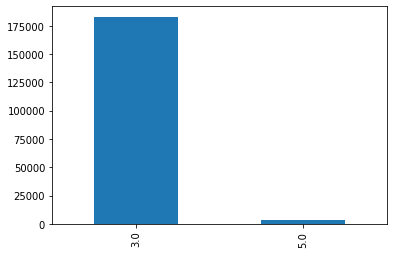

In [84]:
df_tennis['best_of'].value_counts().plot(kind='bar')

The values of this columns are imbalanced: there are many rows with best of equal to 3 and few rows with best of equal to 5.

#### score

It is checked that scores are valid according to the tennis rules (also enunciated below): https://www.wikihow.it/Tenere-il-Punteggio-a-Tennis

If the **match** is at best of 3 then a player, to win, must win 2 sets. If instead it's at best of 5 the playes must win 3 sets.<br>
Every sets is composed by **games**. The winner is the player that wins 6 games with at least 2 games od advantage (for example 6-4, 6-3, ..., but not 6-5).<br>
In the case of 6-5 the first player wins the set is win the following game (7-5).<br>
In case pf 6-6 the **Tie-Break** is played. The Tie-Break is won by the player that is the first to do 7 points with an advantage of 2 (so, for example, 7-5, 7-4, ...). If both the players do 6 points then wins the first that have 2 points of advantage on the adversary (for example 8-6, 9-7, 10-8, ...)

Best of 3 means that there are at most 3 games in a match, while best of 5 means that can be at most 5 sets.

In [85]:
#check that all the scores of the match are valid. (we do not consider nulls)
df_tennis_score = df_tennis[~df_tennis['score'].isna()]

**Walkover** ("WO" or "w/o")- Unopposed victory. A walkover is awarded when the opponent fails to start the match for any reason, such as injury.<br>
**Retirement** ("ret") - Player's withdrawal during a match, causing the player to forfeit the tournament. Usually this happens due to injury<br>
**Default** :def - Disqualification of a player in a match by the chair umpire after the player has received four code violation warnings, generally for their conduct on court. A default can occur with less than four code violations warnings if the code violation is judged severe enough to warrant it. A double default occurs when both players are disqualified. Defaults also occur when a player misses a match with no valid excuse. Defaults are considered losses.<br>
**Bye** :bye - Automatic advancement of a player to the next round of a tournament without facing an opponent. Byes are often awarded in the first round to the top-seeded players in a tournament<br>

These are reasons for games not played or interrupted

In [86]:
#error because less of 2 games without valid reasons
count_less_2 = 0
#error because we have too many games in a match
too_many = 0

#number of walkover
walkover = 0
#errors using RET instead of WO
wrong_walkover = 0
#number of defaults
default = 0
#number of byes
bye = 0

for match in df_tennis[~df_tennis['score'].isna()]['score']:
    sets = match.split( )
    if len(sets)==1 and Walkover(sets[0]):
        walkover+=1
        continue
    if len(sets)==1 and Retirement(sets[0]):
        wrong_walkover+=1
        continue
    if len(sets)==1 and Default(sets[0]):
        default+=1
        continue
    if len(sets)==1 and Bye(sets[0]):
        bye+=1
        continue
    if len(sets)<2:
        count_less_2+=1
        continue
    #maximum number of sets for best of 5 is 6: 5 games + RET or DEF
    if len(sets)>6:
        too_many+=1
        continue

In [87]:
print('walkover:', walkover)
print('wrong_walkover:', wrong_walkover)
print('default:', default)
print('bye:', bye)
print('errors: less than 2 games:', count_less_2)
print('errors: too many games:', too_many)

walkover: 879
wrong_walkover: 8
default: 7
bye: 7
errors: less than 2 games: 35
errors: too many games: 0


<BarContainer object of 5 artists>

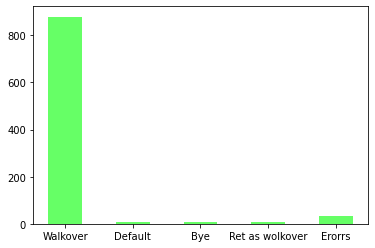

In [88]:
index = ["Walkover", "Default", "Bye", "Ret as wolkover", "Erorrs"]
values = [walkover, default, bye, wrong_walkover, count_less_2+too_many]
plt.bar(index,values, width=0.5, color="#66ff66")

There are games are not played or interrupted because walkover, default, bye or retirements. Sometimes there is a wrong use of retirement at start of the match, because a retirement before the game is called walkover. This is used in a wrong way 8 times. There are also invalid matches because there are too few sets with no interruption of the match.

In [89]:
#best of 5: 3,4 o 5 games, best of 3: 2 or 3 games (with points)
best_5 = 0
best_3 = 0

valid_change_best_of = 0
invalid_matches = 0


#check of the best of 3
for match in df_tennis_score[df_tennis_score['best_of']==3]['score']:
    sets = match.split( )
    #maximum number of sets for best of 3 is 4: 3 games + RET or DEF
    if len(sets)>4 or (len(sets)==4 and not Retirement(sets[3]) and not Default(sets[3])):
        best_5+=1
        #print(sets)
        if validity_match(sets, 5) == True:
            valid_change_best_of +=1
        else:
            invalid_matches+=1
    elif len(sets)>=2:
        if validity_match(sets, 3) == False:
            invalid_matches+=1
        
        
#check of the best of 5
for match in df_tennis_score[df_tennis_score['best_of']==5]['score']:
    sets = match.split( )
    if len(sets)==2 and not Retirement(sets[1]) and not Default(sets[1]):
        best_3+=1
        if validity_match(sets, 3) == True:
            valid_change_best_of +=1
        else:
            invalid_matches+=1
    elif len(sets)>=2:
         if validity_match(sets, 5) == False:
            invalid_matches+=1

    

In [90]:
print('errors: best of 5 classyfied as best of 3:', best_5)
print('errors: best of 3 classyfied as best of 5:', best_3)
print('valid change of best of', valid_change_best_of)
print('Invalid matches', invalid_matches)

errors: best of 5 classyfied as best of 3: 57
errors: best of 3 classyfied as best of 5: 2
valid change of best of 45
Invalid matches 5122


<BarContainer object of 2 artists>

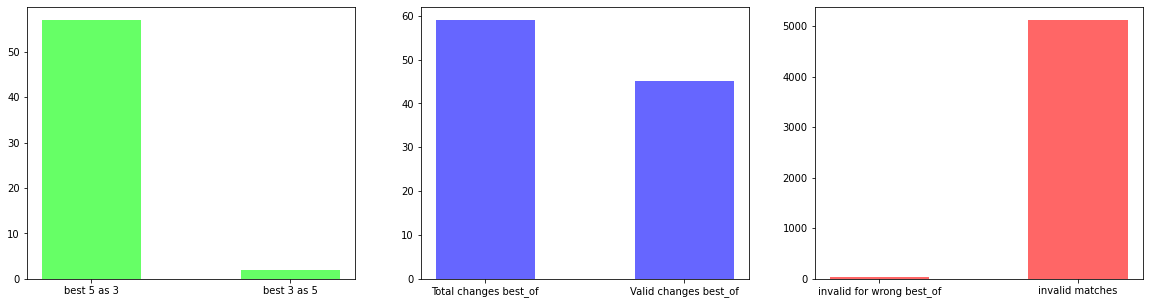

In [91]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 3)

plt.subplot2grid(fig_dims, (0, 0))
plt.bar(["best 5 as 3", "best 3 as 5"], [best_5, best_3], width=0.5, color="#66ff66")

plt.subplot2grid(fig_dims, (0, 1))
plt.bar(["Total changes best_of", "Valid changes best_of"], [best_5+best_3, valid_change_best_of], width=0.5, color="#6666ff")

plt.subplot2grid(fig_dims, (0, 2))
plt.bar(["invalid for wrong best_of", "invalid matches"], [valid_change_best_of, invalid_matches], width=0.5, color="#ff6666")

There are some invalid points about some games of some matches. There are some matches classifyed as best of 3 but have more than 3 games and they can be classified as best of 5. The same for the best of 5. There are some matches that are not valid (5122) because the results of the games are inpossible results because the rules of the tennis. 

We can see in the first bar chart that most of the error of classification are about matches best of 5 classified as best of 3. In the second chart we can notice that we can correct this classification for most of these matches. 

In the 3rd chart we can see that the error we have notice in the match because of a wrong classification are a very small part of the total errors. So, the most of the errors in the scores are not because the classification is wrong, but because the saved results are invalid.

In [92]:
count_5=0
for index, row in  df_tennis_score[df_tennis_score['best_of']==3].iterrows():
    sets = row['score'].split( )
    if validity_match(sets,5) and is_best_of_5(sets):
        count_5+=1

In [93]:
count_3=0
for index, row in  df_tennis_score[df_tennis_score['best_of']==5].iterrows():
    sets = row['score'].split( )
    if validity_match(sets,3) and is_best_of_3(sets):
        count_3+=1

In [94]:
print('best of 5 classyfied as best of 3 looking scores:', count_5)
print('best of 3 classyfied as best of 5 looking scores:', count_3)

best of 5 classyfied as best of 3 looking scores: 97
best of 3 classyfied as best of 5 looking scores: 1


Looking at scores, some best of 3 values can be classified as best of 5 (1) and viceversa (97).

#### match_num

Check if the same match_num appears more than once in the same tourney and in this case how many times it appears. 

In [95]:
df_tennis_matchgroups = df_tennis.drop_duplicates().groupby(['tourney_id', 'match_num']).size().reset_index(name='size')
print(df_tennis_matchgroups[df_tennis_matchgroups['size']>2])
#number of match with more than one winner
df_tennis_matchgroups[df_tennis_matchgroups['size']>2].shape[0]

       tourney_id  match_num  size
7641     2016-520      100.0     3
7642     2016-520      101.0     3
7643     2016-520      102.0     3
7644     2016-520      103.0     3
7645     2016-520      104.0     3
...           ...        ...   ...
145032   2021-540      207.0     4
145033   2021-540      208.0     4
145034   2021-540      209.0     4
145035   2021-540      210.0     4
145036   2021-540      211.0     4

[1764 rows x 3 columns]


1764

We can see that a match can appear more than once, and in particular also 3 or 4 times in the same tourney. Below there is a print of an example where a match num appears 3 times in the same tourney.

In [96]:
df_tennis[(df_tennis['tourney_id']=='2016-520') & (df_tennis['match_num']==100)][['tourney_id', 'tourney_name', 'match_num', 'winner_name', 'loser_name','tourney_level']]

,tourney_id,tourney_name,match_num,winner_name,loser_name,tourney_level
55289,2016-520,Roland Garros,100.0,Louisa Chirico,Tereza Martincova,G
55485,2016-520,Roland Garros,100.0,Serena Williams,Magdalena Rybarikova,G
55612,2016-520,Roland Garros,100.0,Novak Djokovic,Yen Hsun Lu,G


#### draw_size

In [97]:
#count the row with an invalid number (negative or less than 2)
df_tennis[df_tennis['draw_size'] < 2].shape[0]

0

All the numbers of players of a tourney are valid because more than 1 player is present in every tourney (we consider only the numbers and not the nulls)

**tourney_date**

In [98]:
#the date are in float so they need to be converted in date object 
df_tennis['tourney_date'].isnull().sum()

28

In [99]:
#check if there are present data greater then today
df_tennis['tourney_date'] = pd.to_datetime(df_tennis['tourney_date'], format='%Y%m%d')
invalid_data = 0
today = pd.to_datetime(datetime.date.today())
for date in df_tennis['tourney_date']:
    if date > today:
        invalid_data +=1
print(invalid_data)

0


There aren't invalid dates associated to the tourneys

#### winner_ht and loser_ht

Check that all the heights of players (winner and loser) are valid (for example an height of 2 cm is not valid)

In [100]:
df_tennis['winner_ht'].max()

211.0

In [101]:
df_tennis['winner_ht'].min()

2.0

There are invalid height as the one of 2 cm

In [102]:
# print all possibile winner ht in an asc sort order
df_tennis['winner_ht'].value_counts().sort_index()

2.0        81
145.0       9
155.0     144
157.0     143
159.0     139
160.0       7
161.0     114
162.0     232
163.0     474
164.0     271
165.0     298
166.0     493
167.0     282
168.0     981
169.0     221
170.0    3025
171.0     375
172.0    1111
173.0    1340
174.0     987
175.0    2264
176.0     598
177.0    1100
178.0    2442
179.0     370
180.0    4876
181.0     599
182.0    1223
183.0    5202
184.0     572
185.0    5153
188.0    4826
189.0     112
190.0    1955
191.0     355
193.0    3009
194.0      88
196.0    1714
198.0    1420
203.0     328
206.0     166
208.0     101
211.0     141
Name: winner_ht, dtype: int64

<AxesSubplot:title={'center':'winner_ht distribution'}, xlabel='winner_ht', ylabel='Frequency'>

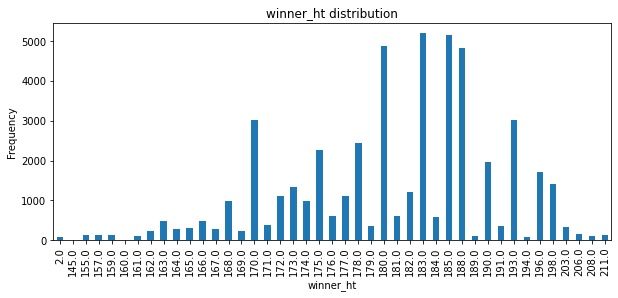

In [103]:
df_tennis['winner_ht'].value_counts().sort_index().plot.bar(
    figsize=(10, 4), 
    title="winner_ht distribution",
    xlabel="winner_ht", 
    ylabel="Frequency")

Plot on all the height in the dataset

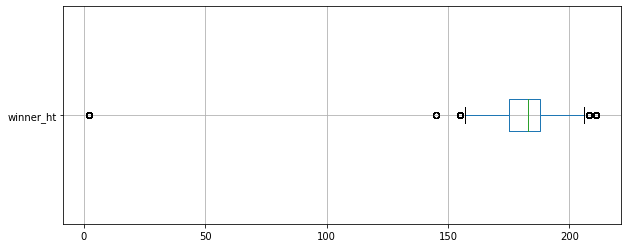

In [104]:
# let's try to find outliers with boxplot visualization
df_tennis.plot.box(y="winner_ht", vert=False, grid=True, figsize=(10, 4));

Search of outliers. We can notice that the ouliers are few values.

Same reasonings for the winner player are done also for the loser

In [105]:
df_tennis['loser_ht'].max()

211.0

In [106]:
df_tennis['loser_ht'].min()

2.0

In [107]:
# print all possibile loser ht in an asc sort order
df_tennis['winner_ht'].value_counts().sort_index()

2.0        81
145.0       9
155.0     144
157.0     143
159.0     139
160.0       7
161.0     114
162.0     232
163.0     474
164.0     271
165.0     298
166.0     493
167.0     282
168.0     981
169.0     221
170.0    3025
171.0     375
172.0    1111
173.0    1340
174.0     987
175.0    2264
176.0     598
177.0    1100
178.0    2442
179.0     370
180.0    4876
181.0     599
182.0    1223
183.0    5202
184.0     572
185.0    5153
188.0    4826
189.0     112
190.0    1955
191.0     355
193.0    3009
194.0      88
196.0    1714
198.0    1420
203.0     328
206.0     166
208.0     101
211.0     141
Name: winner_ht, dtype: int64

<AxesSubplot:title={'center':'loser_ht distribution'}, xlabel='loser_ht', ylabel='Frequency'>

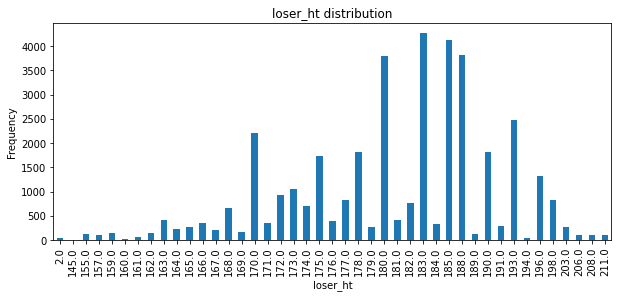

In [108]:
df_tennis['loser_ht'].value_counts().sort_index().plot.bar(
    figsize=(10, 4), 
    title="loser_ht distribution",
    xlabel="loser_ht", 
    ylabel="Frequency")

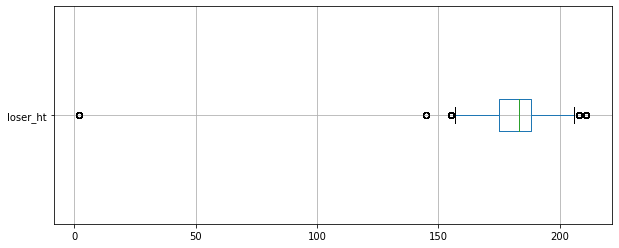

In [109]:
# let's try to find outliers with boxplot visualization
df_tennis.plot.box(y="loser_ht", vert=False, grid=True, figsize=(10, 4));

Check if the players have different heights, i.e. if they have grown over time

In [110]:
# get all players ids from winner and looser, without duplicate
players_ids = list(set(df_tennis['winner_id'].dropna().unique().tolist()) | set(df_tennis['loser_id'].dropna().unique().tolist()))

count = 0

results = []

# find players with different ht
for player_id in players_ids:
    w_ht_players = df_tennis[df_tennis['winner_id']==player_id]['winner_ht'].dropna().unique().tolist()
    l_ht_players = df_tennis[df_tennis['loser_id']==player_id]['loser_ht'].dropna().unique().tolist()
    ht_players = list(set(w_ht_players) | set(l_ht_players))
    diff = len(ht_players)
    if diff > 1:
        results.append(player_id)
        count = count + 1

# print results        
print("find " + str(count) + " players with different height, ids: " + str(results))        
print("")
for player_id in results:
    w_ht_players = df_tennis[df_tennis['winner_id']==player_id]
    l_ht_players = df_tennis[df_tennis['loser_id']==player_id]    
    result = pd.concat([w_ht_players, l_ht_players])
    result.sort_values(by=['tourney_date'], inplace=True)
            
    printhead = True
    last_ht = 0
    for index, row in result.iterrows():             
        if printhead:
            if row["winner_id"] == player_id:
                name = row["winner_name"]
            else:
                name = row["loser_name"]
            print(" --------------- PLAYER " + str(player_id) + " " + name + " --------------- ")
            printhead = False
        age = None
        match_id = row["tourney_id"]
        match_name = row["tourney_name"]
        if row["winner_id"] == player_id:
            ht = row["winner_ht"]
            age = ConvertAge(row['winner_age'])
        else:
            ht = row["loser_ht"]
            age = ConvertAge(row['loser_age'])        
        
        if last_ht != ht:
            print(str(match_id)  + "\t-\t" + match_name  + "\t-\t" + str(ht)  + " - " + str(row["tourney_date"])  + " - " + age)
            last_ht = ht        
    print(" -----------------------------------------------------  ")   

find 1 players with different height, ids: [105676.0]

 --------------- PLAYER 105676.0 David Goffin --------------- 
2016-M020	-	Brisbane	-	163.0 - 2016-01-04 00:00:00 - 25 years, 0 months, 27 days
2018-580	-	Australian Open	-	180.0 - 2018-01-15 00:00:00 - 27 years, 1 months, 8 days
 -----------------------------------------------------  


There is only one player that grown in time (David Goffin)

#### winner_age and loser_age


In [111]:
print(str(df_tennis['winner_age'].max()) + " converted-> " + ConvertAge(df_tennis['winner_age'].max()))

95.0 converted-> 95 years, 0 months, 0 days


In [112]:
print(str(df_tennis['winner_age'].min()) + " converted-> " + ConvertAge(df_tennis['winner_age'].min()))

14.0424366872 converted-> 14 years, 0 months, 15 days


<AxesSubplot:>

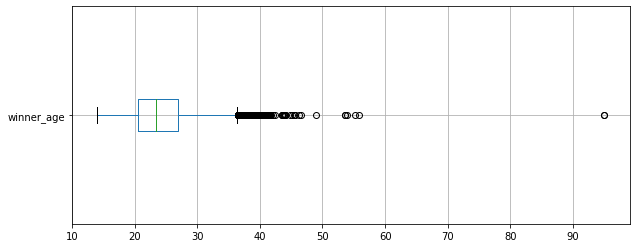

In [113]:
# let's try to find outliers in age with boxplot visualization
df_tennis.boxplot(vert=False, column=['winner_age'], return_type='axes',figsize=(10, 4))

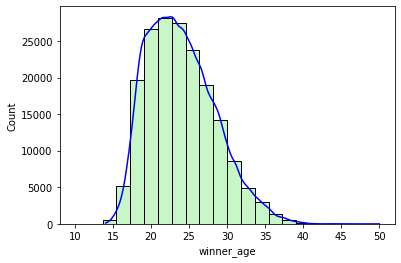

In [114]:
sns.histplot(data=df_tennis['winner_age'], bins="sturges", binrange=(10,50), color="lightgreen", kde=True, kde_kws={'clip':(10,50)}).lines[0].set_color('blue')

Check for outliers and graph with ages. We can notice that most of players have between 20 and 25 years. The same checks are done also for the losers and the ages are graphically compared. We can notice that the age of most losers is bigger than the one for most of the winner.

In [115]:
#loser age

In [116]:
print(str(df_tennis['loser_age'].max()) + " -> " + ConvertAge(df_tennis['loser_age'].max()))
print(str(df_tennis['loser_age'].min()) + " -> " + ConvertAge(df_tennis['loser_age'].min()))

74.4859685147 -> 74 years, 5 months, 22 days
14.006844627 -> 14 years, 0 months, 2 days


In [117]:
# prints a table sorted by winner age, with tournament, winner name and tournament date
df_tennis_tmp = df_tennis.copy() # avoid overwrite original dataset
df_tennis_tmp['loser_age'] = df_tennis_tmp['loser_age'].dropna().apply(lambda x: ConvertAge(x))
df_tennis_tmp['tourney_date'] = pd.to_datetime(df_tennis_tmp['tourney_date'], format='%Y%m%d')
df_tennis_tmp[['tourney_name', 'tourney_date', 'loser_name', 'loser_age']].dropna().sort_values(by='loser_age')

,tourney_name,tourney_date,loser_name,loser_age
128331,Sandelfjord $15K,2018-07-23,Katja Wiersholm,"14 years, 0 months, 14 days"
150371,W15 Cancun,2019-04-15,Isabella Kruger,"14 years, 0 months, 15 days"
122036,Manacor Mallorca $15K,2018-02-05,Gloria Alogo Piqueras,"14 years, 0 months, 16 days"
39655,Tampere $10K,2016-07-18,Emilia Salo,"14 years, 0 months, 2 days"
18856,Heraklion $15K,2017-04-03,Sapfo Sakellaridi,"14 years, 0 months, 2 days"
...,...,...,...,...
137039,W60 Saguenay,2019-10-21,Sylvia Schenck,"55 years, 8 months, 19 days"
162479,W15 Guatemala,2019-11-04,Sylvia Schenck,"55 years, 9 months, 2 days"
176953,W25 Evansville IN,2021-07-12,Sylvia Schenck,"57 years, 5 months, 11 days"
176662,W25 Naples FL,2021-05-03,Gail Falkenberg,"74 years, 3 months, 14 days"


<AxesSubplot:>

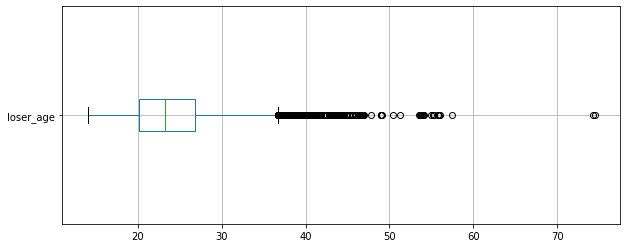

In [118]:
df_tennis.boxplot(vert=False, column=['loser_age'], return_type='axes',figsize=(10, 4))

<AxesSubplot:xlabel='loser_age', ylabel='Density'>

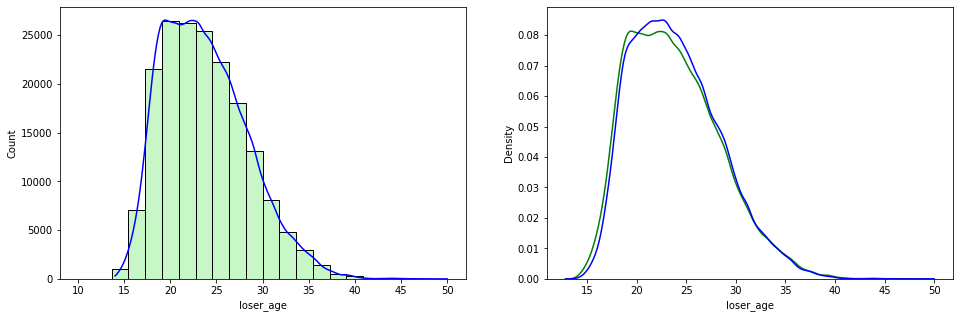

In [119]:
#df_tennis['winner_age'].hist(bins=50, grid=False, range=(10, 50))
#df_tennis['winner_age'].plot(kind='kde', xlim=[10,50])

fig = plt.figure(figsize=(16, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.histplot(data=df_tennis['loser_age'], bins="sturges", binrange=(10,50), color="lightgreen", kde=True, kde_kws={'clip':(10,50)}).lines[0].set_color('blue')

plt.subplot2grid(fig_dims, (0, 1))
sns.kdeplot(data=df_tennis['loser_age'], color="green", clip=(10,50))
sns.kdeplot(data=df_tennis['winner_age'], color="blue", clip=(10,50))

#### minutes

Here, it is checked that the duration (in minutes) of the matches is not negative, what is the maximum duration and what is the mean considering matches with the same maximum number of sets. Then the outliers are analyzed.

In [120]:
df_tennis.loc[df_tennis['minutes'] < 0, 'minutes'].count()

0

In [121]:
df_tennis.loc[df_tennis['minutes'] == 0, 'minutes'].count()

128

In [122]:
df_tennis['minutes'].min()

0.0

In [123]:
df_tennis['minutes'].max()

4756.0

In [124]:
df_tennis[df_tennis['best_of']==3]['minutes'].mean()

95.47164258962012

In [125]:
df_tennis[df_tennis['best_of']==5]['minutes'].mean()

152.58774992066012

On average, best-of-3 tennis matches last about 90 minutes, while best-of-5 matches last about 152 minutes 

In [126]:
print(str(df_tennis['minutes'].max()) + " converted-> " + ConvertTime(df_tennis['minutes'].max()))

0.0
4756.0 converted-> 79H:16m:00s


<AxesSubplot:>

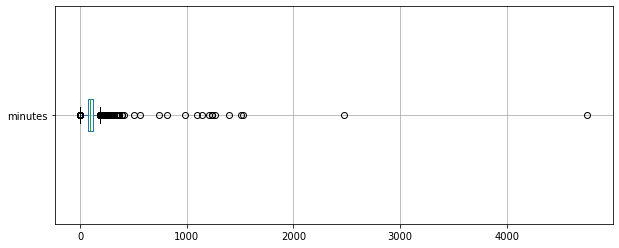

In [127]:
# let's try to find outliers in minutes with scatter visualization
df_tennis.boxplot(vert=False, column=['minutes'], return_type='axes',figsize=(10, 4))

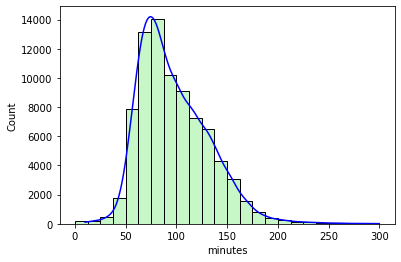

In [128]:
sns.histplot(data=df_tennis['minutes'], bins="doane", binrange=(0,300), color="lightgreen", kde=True, kde_kws={'clip':(10,300)}).lines[0].set_color('blue')

Longest tennis games in history worldwide is 11 hours and 5 minutes (= 665 minutes) for best of 5 and 6 hours and 31 mintes for best of 3, so these are used as threshold for outliers

In [129]:
df_tennis[df_tennis['minutes']> 665].shape[0]

14

There are 128 entry with a match duration equal to 0, a tennis match duration is on average 40 minutes our mean is 97.67.

In [130]:
df_tennis_min_filtered = df_tennis[df_tennis['minutes']<= 0]
df_tennis_min_checked = df_tennis_min_filtered.apply(lambda x: IsMatchWithZeroIncorrect(x['score']), axis=1)
df_tennis_min_zero_res = df_tennis_min_filtered[df_tennis_min_checked]
df_tennis_min_zero_res[['tourney_id', 'score', 'minutes']]

,tourney_id,score,minutes
248,2019-M001,3-6 6-3 6-4,0.0
5008,2019-560,NaN,0.0
7879,2018-M007,6-3 6-2,0.0
29782,2017-0804,7-5 6-1,0.0
33939,2017-M007,0-0 RET,0.0
98553,2021-2030,6-2 6-2,0.0
104107,2019-7085,7-5 2-0 RET,0.0


0 could be considered as a default value

#### w_ace, w_df and w_svpt

It is checked if the number of aces, double faults and service points are invalid and are compared. Also outliers are analyzed for service points. This is done both for winner and loser

In [131]:
negative_w_ace = df_tennis.loc[df_tennis['w_ace'] < 0].shape[0]
print(negative_w_ace)

0


In [132]:
#check if there are more ace than service performed
df_tennis.loc[df_tennis['w_svpt'] < df_tennis['w_ace']].shape[0]

0

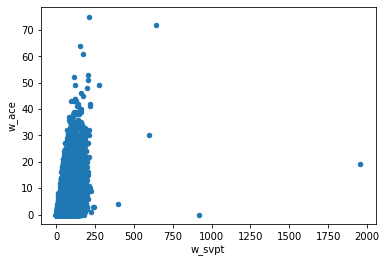

In [133]:
df_tennis.plot.scatter('w_svpt', 'w_ace')
plt.show()

In [134]:
#W_df: winner's number of doubles faults
negative_w_df = df_tennis.loc[df_tennis['w_df'] < 0].shape[0]
print(negative_w_df)

0


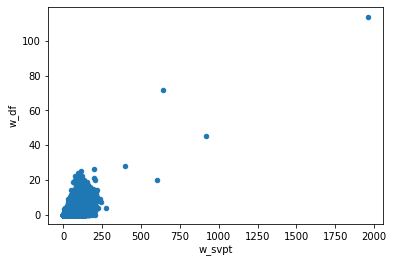

In [135]:
df_tennis.plot.scatter('w_svpt', 'w_df')
plt.show()

In [136]:
#check if there are more double faults than service performed
df_tennis.loc[df_tennis['w_svpt'] < df_tennis['w_df']].shape[0]

0

In [137]:
#W_svpt: winner's number of serve points
negative_w_ace = df_tennis.loc[df_tennis['w_svpt'] < 0].shape[0]
print(negative_w_ace)

0


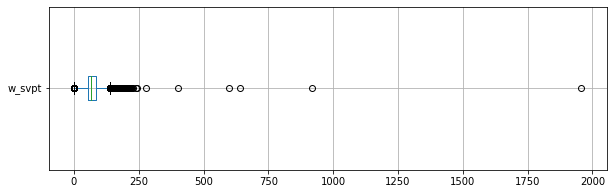

In [138]:
#check for outliers for w_svpt
df_tennis.boxplot(vert=False, column=['w_svpt'], return_type='axes',figsize=(10, 3))
plt.show()

There are outiliers in the service point, values that goes over twenty-five hundred.
*It can be theoretically possible.*

In [139]:
df_tennis.loc[df_tennis['w_svpt'] >300][['tourney_id', 'tourney_name', 'best_of', 'score','winner_name','w_svpt','w_ace','loser_name','l_svpt', 'l_ace']]

,tourney_id,tourney_name,best_of,score,winner_name,w_svpt,w_ace,loser_name,l_svpt,l_ace
99364,2021-1038,Madrid,3.0,1-6 7-6(6) 6-0,Su Wei Hsieh,1957.0,19.0,Jaqueline Adina Cristian,1672.0,19.0
99384,2021-709,Rome,3.0,7-5 6-4,Petra Martic,600.0,30.0,Jessica Pegula,810.0,20.0
99567,2021-406,Strasbourg,3.0,6-4 7-6(6),Jule Niemeier,640.0,72.0,Shelby Rogers,624.0,40.0
99631,2021-1080,Nottingham,3.0,3-6 7-5 7-6(3),Alison Riske,400.0,4.0,Xiyu Wang,464.0,16.0
99994,2021-2037,Gdynia,3.0,5-7 7-5 6-1,Kateryna Kozlova,918.0,0.0,Katarzyna Kawa,972.0,0.0


#### l_ace, l_df and l_svpt

In [140]:
negative_l_ace = df_tennis.loc[df_tennis['l_ace'] < 0].shape[0]
print(negative_l_ace)

0


In [141]:
#check if there are more ace than service performed
df_tennis.loc[df_tennis['l_svpt'] < df_tennis['l_ace']].shape[0]

0

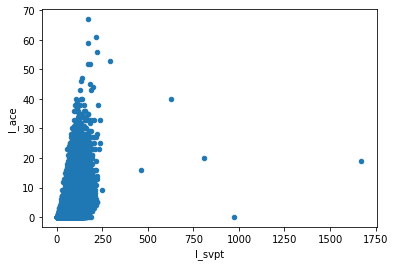

In [142]:
df_tennis.plot.scatter('l_svpt', 'l_ace')
plt.show()

In [143]:
#W_df: winner's number of doubles faults
negative_l_df = df_tennis.loc[df_tennis['l_df'] < 0].shape[0]
print(negative_l_df)

0


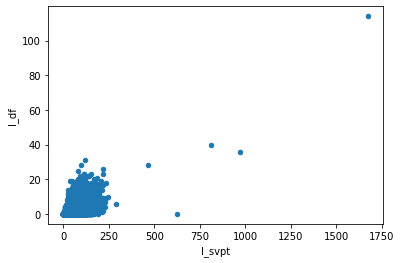

In [144]:
df_tennis.plot.scatter('l_svpt', 'l_df')
plt.show()

In [145]:
#check if there are more double faults than service performed
df_tennis.loc[df_tennis['l_svpt'] < df_tennis['l_df']].shape[0]

0

In [146]:
#W_svpt: winner's number of serve points
negative_l_ace = df_tennis.loc[df_tennis['l_svpt'] < 0].shape[0]
print(negative_l_ace)

0


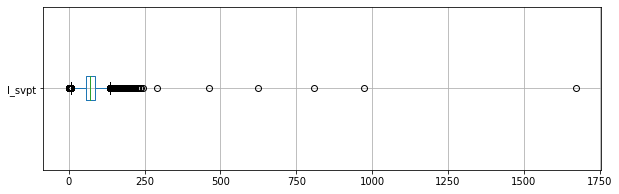

In [147]:
#check for outliers for w_svpt
df_tennis.boxplot(vert=False, column=['l_svpt'], return_type='axes',figsize=(10, 3))
plt.show()

#### w_1stIn and l_1stIn

Check if the number of first serves of winner and loser are valid (non negative)

In [148]:
#check to find negative values
df_tennis.loc[df_tennis['w_1stIn'] < 0].shape[0]

0

In [149]:
#check on loser’s number of first serves made to find negative values
df_tennis.loc[df_tennis['l_1stIn'] < 0].shape[0]

0

#### w_1stWon and w_2ndWon

Check if the number of first serves won of winner and loser are valid (non negative and less or equal to the first serve made)

In [150]:
#check to find negative values
df_tennis.loc[df_tennis['w_1stWon'] < 0].shape[0]

0

In [151]:
#check if there are more w_1stWon than fist service performed
df_tennis.loc[df_tennis['w_1stIn'] < df_tennis['w_1stWon']].shape[0]

0

In [152]:
#check to find negative values
df_tennis.loc[df_tennis['w_2ndWon'] < 0].shape[0]

0

Check that the number of first serves made are not greater of the number of service points and that this is also smaller than the sum of the first serves won and the second serves won. Otherwise these values would be invalid.

In [153]:
#check that the number of serve point is not smaller than the number of first serves 
df_tennis[df_tennis['w_svpt'] < df_tennis['w_1stIn']].shape[0]

0

In [154]:
#check that the number of serve point is not smaller than won serve points (first and second serve)
df_tennis[df_tennis['w_svpt'] < df_tennis['w_1stWon']+df_tennis['w_2ndWon']].shape[0]

0

#### l_1stWon and l_2ndWon


There are done the same checks done for the winner.

In [155]:
df_tennis.loc[df_tennis['l_1stWon'] < 0].shape[0]

0

In [156]:
df_tennis.loc[df_tennis['l_1stIn'] < df_tennis['l_1stWon']].shape[0]

0

In [157]:
df_tennis.loc[df_tennis['l_2ndWon'] < 0].shape[0]

0

In [158]:
df_tennis[df_tennis['l_svpt'] < df_tennis['l_1stIn']].shape[0]

0

In [159]:
df_tennis[df_tennis['l_svpt'] < df_tennis['l_1stWon']+df_tennis['l_2ndWon']].shape[0]

0

#### w_SvGms,  w_bpSaved and w_bpFaced

Check that the number of service games is not negative and that it is valid looking at the score column because these 2 columns are related.

In [160]:
#Checks on w_SvGms
df_tennis.loc[df_tennis['w_SvGms'] < 0].shape[0]

0

In [161]:
import re
#w_SvGms: winner’s number of serve games
re_score1 = "\d[\d-][^()]"
re_score2 = "\d"
df_cleaned = df_tennis[~(df_tennis['score'].isnull()) & ~(df_tennis['w_SvGms'].isnull())]
scores = df_cleaned['score'].tolist()
invalid_SvGms = []
for i, score in enumerate(df_tennis['score'].tolist()):
    if ((df_tennis.at[i,'score'] == 'nan') | (str(df_tennis.at[i,'w_SvGms']) == 'nan')):
        continue
#     if (Retirement(score) | Walkover(score) | Default(score) | Bye(score)):
#         continue
    int_scores = re.findall(re_score1, str(score))
    int_scores = re.findall(re_score2, str(int_scores))
    if(len(int_scores) > 6):
        continue
    score_sum = np.sum(list(map(lambda x: int(x), int_scores)))
    if (((np.floor(score_sum/2) - 2) <= df_tennis.at[i,'w_SvGms']) or 
        ((np.ceil(score_sum/2) + 2) >= df_tennis.at[i,'w_SvGms'])):
        continue
    invalid_SvGms.append(i)
#     print('+++ SCORE INVALID +++')
#     print("SCORE -> " + str(df_tennis.at[i,'score']))
#     print("GAME SERVITI -> " + str(df_tennis.at[i,'w_SvGms']))
#     print(np.floor(score_sum/2))
#     print(np.ceil(score_sum/2))
#     print('+++++++')
print(invalid_SvGms)

[]


Check that the number of breakpoint saved and faced are valid (non negative and number of saved is bigger than the number of faced). Also the outliers are analyzed for both the columns

In [162]:
df_tennis['w_bpSaved'].min() < 0

False

In [163]:
df_tennis['w_bpFaced'].min() < 0

False

In [164]:
#check that number of faces is never bigger than number of saved
df_tennis[df_tennis['w_bpSaved']>df_tennis['w_bpFaced']].shape[0]

0

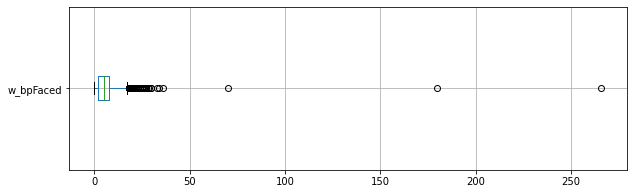

In [165]:
#check for outliers for w_bpFaced
df_tennis.boxplot(vert=False, column=['w_bpFaced'], return_type='axes',figsize=(10, 3))
plt.show()

In [166]:
df_tennis[df_tennis['w_bpFaced']>75][['tourney_id', 'tourney_name', 'best_of', 'score','winner_name','w_bpFaced','loser_name','w_bpFaced']]

,tourney_id,tourney_name,best_of,score,winner_name,w_bpFaced,loser_name,w_bpFaced
99364,2021-1038,Madrid,3.0,1-6 7-6(6) 6-0,Su Wei Hsieh,266.0,Jaqueline Adina Cristian,266.0
99994,2021-2037,Gdynia,3.0,5-7 7-5 6-1,Kateryna Kozlova,180.0,Katarzyna Kawa,180.0


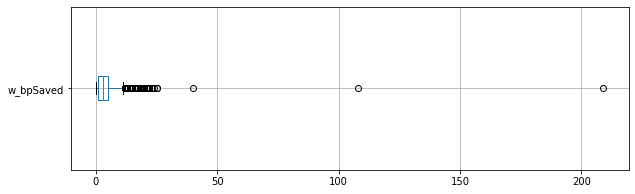

In [167]:
#check for outliers for w_bpSaved
df_tennis.boxplot(vert=False, column=['w_bpSaved'], return_type='axes',figsize=(10, 3))
plt.show()

In [168]:
df_tennis[df_tennis['w_bpSaved']>75][['tourney_id', 'tourney_name', 'best_of', 'score','winner_name','w_bpFaced','w_bpSaved','loser_name','l_bpFaced','l_bpSaved']]

,tourney_id,tourney_name,best_of,score,winner_name,w_bpFaced,w_bpSaved,loser_name,l_bpFaced,l_bpSaved
99364,2021-1038,Madrid,3.0,1-6 7-6(6) 6-0,Su Wei Hsieh,266.0,209.0,Jaqueline Adina Cristian,190.0,114.0
99994,2021-2037,Gdynia,3.0,5-7 7-5 6-1,Kateryna Kozlova,180.0,108.0,Katarzyna Kawa,180.0,81.0


#### l_SvGms,  l_bpSaved and l_bpFaced

The same checks for the winners are done aso for the losers

In [169]:
df_tennis.loc[df_tennis['l_SvGms'] < 0].shape[0]

0

In [170]:
#l_SvGms: loser’s number of serve games
re_score1 = "\d[\d-][^()]"
re_score2 = "\d"
df_cleaned = df_tennis[~(df_tennis['score'].isnull()) & ~(df_tennis['l_SvGms'].isnull())]
scores = df_cleaned['score'].tolist()
invalid_SvGms = []
for i, score in enumerate(df_tennis['score'].tolist()):
    if ((df_tennis.at[i,'score'] == 'nan') | (str(df_tennis.at[i,'l_SvGms']) == 'nan')):
        continue
#     if (Retirement(score) | Walkover(score) | Default(score) | Bye(score)):
#         continue
    int_scores = re.findall(re_score1, str(score))
    int_scores = re.findall(re_score2, str(int_scores))
    if(len(int_scores) > 6):
        continue
    score_sum = np.sum(list(map(lambda x: int(x), int_scores)))
    if (((np.floor(score_sum/2) - 2) <= df_tennis.at[i,'l_SvGms']) or 
        ((np.ceil(score_sum/2) + 2) >= df_tennis.at[i,'l_SvGms'])):
        continue
    invalid_SvGms.append(i)
#     print('+++ SCORE INVALIDO +++')
#     print("SCORE -> " + str(df_tennis.at[i,'score']))
#     print("GAME SERVITI -> " + str(df_tennis.at[i,'w_SvGms']))
#     print(np.floor(score_sum/2))
#     print(np.ceil(score_sum/2))
#     print('+++++++')
print(invalid_SvGms)

[]


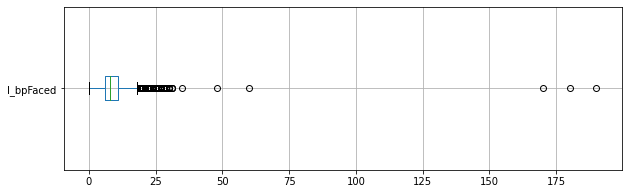

In [171]:
#check for outliers for w_bpFaced
df_tennis.boxplot(vert=False, column=['l_bpFaced'], return_type='axes',figsize=(10, 3))
plt.show()

In [172]:
df_tennis[df_tennis['l_bpFaced']>75][['tourney_id', 'tourney_name', 'best_of', 'score','winner_name','w_bpFaced','loser_name','l_bpFaced']]

,tourney_id,tourney_name,best_of,score,winner_name,w_bpFaced,loser_name,l_bpFaced
99364,2021-1038,Madrid,3.0,1-6 7-6(6) 6-0,Su Wei Hsieh,266.0,Jaqueline Adina Cristian,190.0
99384,2021-709,Rome,3.0,7-5 6-4,Petra Martic,70.0,Jessica Pegula,170.0
99994,2021-2037,Gdynia,3.0,5-7 7-5 6-1,Kateryna Kozlova,180.0,Katarzyna Kawa,180.0


In [173]:
df_tennis['l_bpSaved'].min() < 0

False

In [174]:
df_tennis['l_bpFaced'].min() < 0

False

In [175]:
#check that number of faces is never bigger than number of saved
df_tennis[df_tennis['l_bpSaved']>df_tennis['l_bpFaced']].shape[0]

0

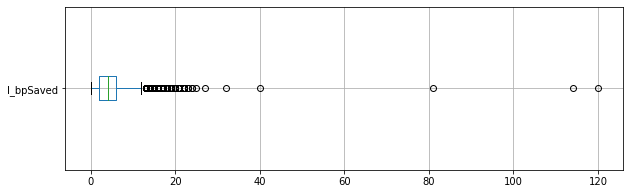

In [176]:
#check for outliers for l_bpSaved
df_tennis.boxplot(vert=False, column=['l_bpSaved'], return_type='axes',figsize=(10, 3))
plt.show()

In [177]:
df_tennis[df_tennis['l_bpSaved']>75][['tourney_id', 'tourney_name', 'best_of', 'score','winner_name','w_bpFaced','w_bpSaved','loser_name','l_bpFaced','l_bpSaved']]

,tourney_id,tourney_name,best_of,score,winner_name,w_bpFaced,w_bpSaved,loser_name,l_bpFaced,l_bpSaved
99364,2021-1038,Madrid,3.0,1-6 7-6(6) 6-0,Su Wei Hsieh,266.0,209.0,Jaqueline Adina Cristian,190.0,114.0
99384,2021-709,Rome,3.0,7-5 6-4,Petra Martic,70.0,40.0,Jessica Pegula,170.0,120.0
99994,2021-2037,Gdynia,3.0,5-7 7-5 6-1,Kateryna Kozlova,180.0,108.0,Katarzyna Kawa,180.0,81.0


#### Winner_rank and loser_rank

Check that the rank of winners and losers is not negative (is valid) and look at outliers

In [178]:
df_tennis['winner_rank'].max()

2220.0

In [179]:
df_tennis['winner_rank'].min() >= 1 #there cannot be rank smaller than 1

True

In [180]:
df_tennis['winner_rank'].min()

1.0

<AxesSubplot:>

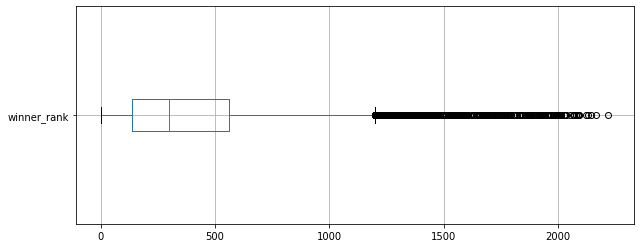

In [181]:
df_tennis.boxplot(vert=False, column=['winner_rank'], return_type='axes',figsize=(10, 4))

In [182]:
df_tennis['loser_rank'].max()

2257.0

In [183]:
df_tennis['loser_rank'].min() >= 1 #there cannot be rank smaller than 1

True

In [184]:
df_tennis['loser_rank'].min()

1.0

<AxesSubplot:>

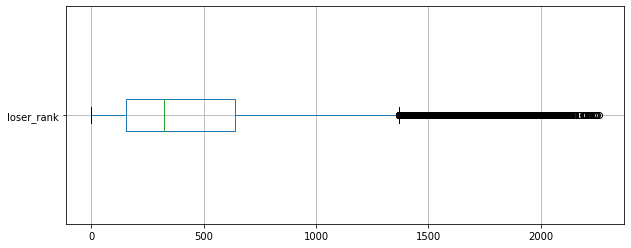

In [185]:
df_tennis.boxplot(vert=False, column=['loser_rank'], return_type='axes',figsize=(10, 4))

#### Winner_rank_points and loser_rank_points

Check that the points to calculate the rank are not less than 0 and look at outliers for both winners and losers

In [186]:
df_tennis['winner_rank_points'].max()<21750 #21750 is the maximum a player can reach

True

In [187]:
df_tennis['winner_rank_points'].max()

16950.0

In [188]:
df_tennis['winner_rank_points'].min()

1.0

In [189]:
df_tennis[df_tennis['winner_rank_points'] == df_tennis['winner_rank_points'].min()].shape[0] 

209

<AxesSubplot:>

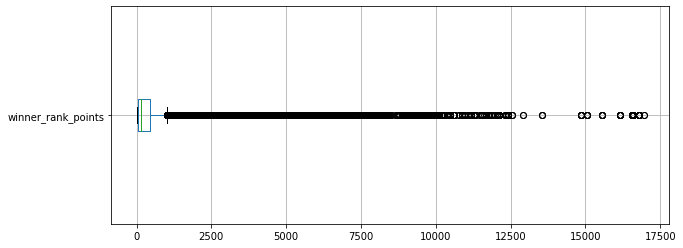

In [190]:
df_tennis.boxplot(vert=False, column=['winner_rank_points'], return_type='axes',figsize=(10, 4))

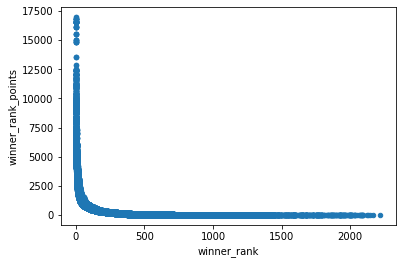

In [191]:
df_tennis.plot.scatter('winner_rank', 'winner_rank_points')
plt.show()

In [192]:
df_tennis['loser_rank_points'].max()<21750 #21750 is the maximum a player can reach

True

In [193]:
df_tennis['loser_rank_points'].max()

16950.0

In [194]:
df_tennis['loser_rank_points'].min()

1.0

In [195]:
df_tennis[df_tennis['loser_rank_points'] == df_tennis['loser_rank_points'].min()].shape[0] 

729

<AxesSubplot:>

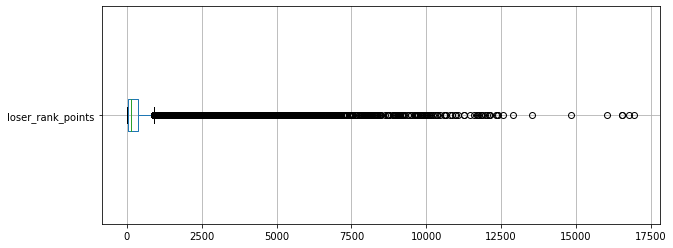

In [196]:
df_tennis.boxplot(vert=False, column=['loser_rank_points'], return_type='axes',figsize=(10, 4))

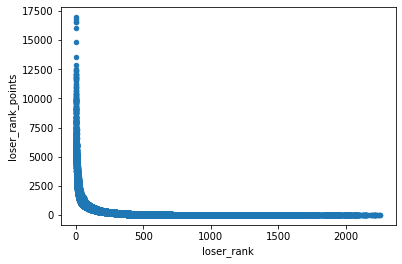

In [197]:
df_tennis.plot.scatter('loser_rank', 'loser_rank_points')
plt.show()

**tourney_spectators**

Check that spectators to the tourney are not less than 0 and look at minimum and maximum

In [198]:
df_tennis['tourney_spectators'].min() < 0

False

In [199]:
df_tennis['tourney_spectators'].max()

18086.0

In [200]:
df_tennis['tourney_spectators'].min()

91.0

**tourney_revenue**

Check what is the range of the revenue associated to the tourneys and that it is not less than 0

In [201]:
df_tennis['tourney_revenue'].min() < 0

False

In [202]:
df_tennis['tourney_revenue'].max()

5002793.97

In [203]:
df_tennis['tourney_revenue'].min()

17865.74

## Correlation

Here, we analyze the correlations between the columns of the tennis dataset.  To do this we consider only numeric attributes and not categorical ones.

In [204]:
df_numeric = df_tennis[['draw_size', 'minutes','w_ace','w_df','w_svpt','w_1stIn', 'w_1stWon', 'w_2ndWon', 
                        'w_SvGms', 'winner_rank', 'winner_rank_points', 'w_bpSaved',  'w_bpFaced','l_ace',
                        'l_df','l_svpt','l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'loser_rank', 
                        'loser_rank_points', 'l_bpSaved',  'l_bpFaced', 'tourney_spectators', 'tourney_revenue',
                       'winner_ht','winner_age','loser_ht','loser_age']]
df_numeric

,draw_size,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,winner_rank,...,loser_rank,loser_rank_points,l_bpSaved,l_bpFaced,tourney_spectators,tourney_revenue,winner_ht,winner_age,loser_ht,loser_age
0,32.0,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,9.0,...,16.0,1977.0,10.0,15.0,3928.0,742618.69,178.0,95.000000,198.0,22.885695
1,32.0,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,16.0,...,239.0,200.0,10.0,13.0,3928.0,742618.69,198.0,22.885695,188.0,33.705681
2,32.0,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,9.0,...,40.0,1050.0,1.0,5.0,3928.0,742618.69,178.0,29.004791,188.0,31.882272
3,32.0,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,239.0,...,31.0,1298.0,4.0,6.0,3928.0,742618.69,188.0,33.705681,183.0,19.868583
4,32.0,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,16.0,...,18.0,1855.0,2.0,4.0,3928.0,742618.69,198.0,22.885695,196.0,28.010951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186123,32.0,NaN,NaN,1.0,NaN,49.0,38.0,16.0,NaN,NaN,...,280.0,183.0,7.0,11.0,NaN,NaN,NaN,26.206708,NaN,26.904860
186124,32.0,71.0,10.0,8.0,63.0,NaN,32.0,NaN,10.0,255.0,...,704.0,NaN,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN
186125,NaN,70.0,NaN,2.0,55.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.0,NaN,NaN,NaN,26.642026,NaN,NaN
186126,32.0,115.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,176.0,...,NaN,NaN,3.0,NaN,3535.0,NaN,170.0,NaN,NaN,NaN


<AxesSubplot:>

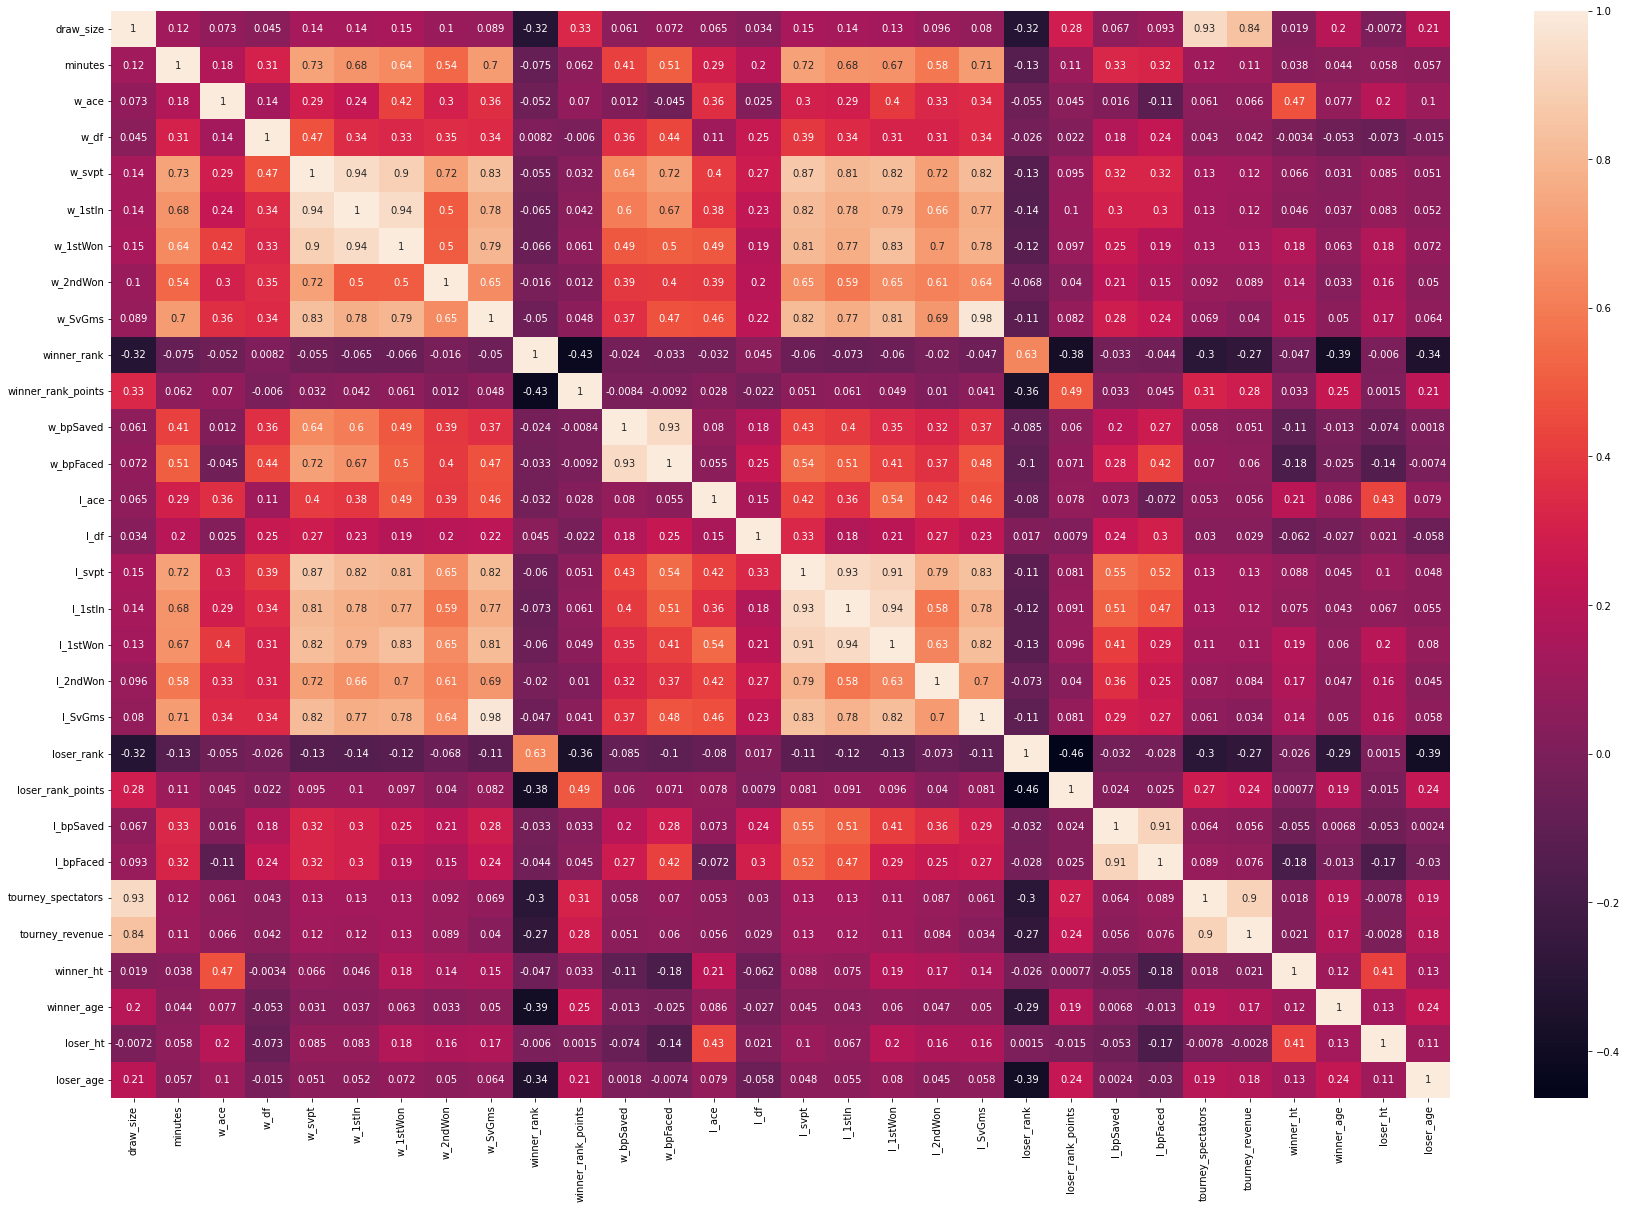

In [205]:
plt.figure(figsize = (30,20))
sns.heatmap(df_numeric.corr(), annot=True)

In [206]:
treshold = 0.8
correlation = df_numeric.corr()
correlation_filtered = correlation[correlation>treshold]
correlation_filtered

,draw_size,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,winner_rank,...,loser_rank,loser_rank_points,l_bpSaved,l_bpFaced,tourney_spectators,tourney_revenue,winner_ht,winner_age,loser_ht,loser_age
draw_size,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.929342,0.842169,NaN,NaN,NaN,NaN
minutes,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_ace,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_df,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_svpt,NaN,NaN,NaN,NaN,1.000000,0.938764,0.895809,NaN,0.830342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_1stIn,NaN,NaN,NaN,NaN,0.938764,1.000000,0.942714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_1stWon,NaN,NaN,NaN,NaN,0.895809,0.942714,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_2ndWon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_SvGms,NaN,NaN,NaN,NaN,0.830342,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner_rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
correlation_filtered = correlation[correlation_filtered.sum()>1]
correlation_filtered = correlation_filtered[correlation_filtered>treshold]
correlation_filtered = correlation_filtered.dropna(axis=1,how='all')
correlation_filtered

,draw_size,w_svpt,w_1stIn,w_1stWon,w_SvGms,w_bpSaved,w_bpFaced,l_svpt,l_1stIn,l_1stWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_spectators,tourney_revenue
draw_size,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929342,0.842169
w_svpt,NaN,1.000000,0.938764,0.895809,0.830342,NaN,NaN,0.866745,0.811052,0.823539,0.819756,NaN,NaN,NaN,NaN
w_1stIn,NaN,0.938764,1.000000,0.942714,NaN,NaN,NaN,0.817496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_1stWon,NaN,0.895809,0.942714,1.000000,NaN,NaN,NaN,0.808253,NaN,0.831252,NaN,NaN,NaN,NaN,NaN
w_SvGms,NaN,0.830342,NaN,NaN,1.000000,NaN,NaN,0.815544,NaN,0.814072,0.981276,NaN,NaN,NaN,NaN
w_bpSaved,NaN,NaN,NaN,NaN,NaN,1.00000,0.93244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w_bpFaced,NaN,NaN,NaN,NaN,NaN,0.93244,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l_svpt,NaN,0.866745,0.817496,0.808253,0.815544,NaN,NaN,1.000000,0.931877,0.910678,0.834520,NaN,NaN,NaN,NaN
l_1stIn,NaN,0.811052,NaN,NaN,NaN,NaN,NaN,0.931877,1.000000,0.935864,NaN,NaN,NaN,NaN,NaN
l_1stWon,NaN,0.823539,NaN,0.831252,0.814072,NaN,NaN,0.910678,0.935864,1.000000,0.824717,NaN,NaN,NaN,NaN


**w_svpt, w_1stIn, w_1stWon, w_SvGms** are all correlated because more service game (w_SvGms) a player does and, as consequence, more serve points (w_svpt) ze does (because if the player serves in a game, ze serves for all the points in that game, so these number increase together). If a player serves, the number of the first serves (W_1stln) increase. Increasing the number of first serves, the probability of won some of these serves increase so, more first serves we do, more won first serves (W_1stWon) we expect. The same reasoning is done also for the loser. Furhermore, winner and loser serves in an alternate way so, if the number of serves of the winner increase (for example because of more games), then also the number of the loser increase, so these information grown together.

**w_bpSaved and w_bpFaced** are correlated because more are the breakpoints faced and more can be the breakpoint saved.  The same reasoning is done also for the loser.

**draw_size**, **tourney_revenue**, **tourney_spectators** are all correlated. This can be interpreted as the fact that the tourneys with more players attract more people to see the matches and have a bigger budget respect to the the tourneys with less players.

In [208]:
correlation_filtered = correlation[correlation<-treshold]
correlation_filtered = correlation_filtered[correlation_filtered<-treshold]
correlation_filtered.dropna(axis=1,how='all',inplace=True)
correlation_filtered

""
draw_size
minutes
w_ace
w_df
w_svpt
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
winner_rank


There are no negative correlations to consider